## КАСТОМИЗАЦИЯ ПРЕДПОЧТЕНИЙ КЛИЕНТОВ ИНТЕРНЕТ-МАГАЗИНА ДЛЯ ПОВЫШЕНИЯ ЭФФЕКТИВНОСТИ БИЗНЕСА   

###  Цель исследований

   Целью проекта является повышение качественных и количественных метрик бизнеса интернет-магазина за счет выявления общих
закономерностей потребительской активности клиентов и выдачи адресных рекомендаций по кастомизации сервиса и категоризированной 
стимуляции продаж.  

###  ССЫЛКА НА ПРЕЗЕНТАЦИЮ: https://disk.yandex.ru/i/nM4DnXZIpAXmcg

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from urllib.parse import urlencode 
from scipy import stats as st
import random
import statistics as stat
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

### ЭТАПЫ ВЫПОЛНЕНИЯ РАБОТЫ
1. [Загрузка данных для анализа](#start)
2. [Подготовка данных к анализу](#start1)
3. [Разделение продукции интернет-магазина на категории](#start2)
4. [Распределение клиентов интернет-магазина по числу заказов и среднему чеку](#start3)
5. [Изучение структуры продаж интернет-магазина](#start4)
6. [Распределение среднего чека клиентов интернет-магазина по категориям ](#start5)
7. [Когортный анализ клиентов интернет-магазина](#start6)
8. [Статистическое сравнение распределений стоимости заказов разных категорий товаров](#start7)
9. [Кластеризация заказов интернет-магазина](#start8)
10. [Статистическое сравнение совокупностей среднего чека клиентов в выделенных кластерах](#start20) 
11. [Выводы и рекомендации](#start9)

<div class="alert alert-info">
  <b> Загрузка данных для анализа </b>
    <a id="start"></a> 
</div>

In [2]:
df = pd.read_csv('/datasets/ecom_dataset_upd.csv')
df[100:3150]

,date,customer_id,order_id,product,quantity,price
100,2018100421,b02045c7-8d41-463e-8bba-cb172a28125e,68531,Плед флисовый 100% полиэстер 185х240 см бежевы...,1,1049.0
101,2018100421,b02045c7-8d41-463e-8bba-cb172a28125e,68531,Скатерть Династия 100% полиэфир прямоугольная ...,1,1949.0
102,2018100500,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0
103,2018100500,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете п...,1,207.0
104,2018100500,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0
...,...,...,...,...,...,...
3145,2019042423,896fac99-3a80-48d0-a3c5-41167cd15275,14689,Пеларгония розебудная Prins Nikolai укорененны...,1,135.0
3146,2019042423,896fac99-3a80-48d0-a3c5-41167cd15275,14689,Пеларгония розебудная Queen Ingrid укорененный...,1,135.0
3147,2019042423,15056e00-1aaf-483b-b429-4e9f41ee82b6,71257,Кружка О МИННИ 250 мл H6441 Luminarc Франция,1,239.0
3148,2019042509,d1c5bf9b-4b85-49c6-86af-77b20c5d6034,14691,Пеларгония розебудная Margaretha укорененный ч...,1,135.0


<div class="alert alert-info">
  <b> Подготовка данных для анализа </b>
    <a id="start1"></a> 
</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


In [4]:
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [5]:
df['date'] = df['date'].astype(str)

In [6]:
def rt(a):
    b = list(a)
    b.insert(4, '-')
    b.insert(7, '-')
    b.insert(10, '|')
    return "".join(b)
df['date'] = df['date'].apply(rt)

In [7]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d|%H')

In [8]:
df.duplicated().sum()

0

<div class="alert alert-info">
   Исхоmдный датафрейм содержит 6 полей и 7474 строк. Пропусков в столбцах нет. Полных дубликатов строк также нет.
   Тип данных поля 'date' (int64) был преобразован в datetime64. Остальные данные имеют правильный тип. 
</b>

In [9]:
df['order_id'].nunique()

3521

In [10]:
df['date'].nunique()

3126

In [11]:
df['order_id'].duplicated().sum()

3953

In [12]:
df['customer_id'].nunique()

2451

In [13]:
#df = df.drop_duplicates(subset=['order_id'])

In [14]:
g = df.groupby('order_id', as_index = False).agg({'date':'nunique'})
g['date'].unique()

array([ 1,  7,  4,  2,  6,  3, 74,  5, 23,  9, 12, 10, 60,  8, 16])

In [15]:
g_ = g.query('date > 1')
g_['order_id'].nunique()

284

In [16]:
df = df.loc[~df['order_id'].isin(g_['order_id'])]

In [17]:
len(df)

5003

In [18]:
set(g_['order_id']).intersection(set(df['order_id']))

set()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5003 non-null   datetime64[ns]
 1   customer_id  5003 non-null   object        
 2   order_id     5003 non-null   int64         
 3   product      5003 non-null   object        
 4   quantity     5003 non-null   int64         
 5   price        5003 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 273.6+ KB


In [20]:
df['order_id'].nunique()

3237

In [21]:
df['customer_id'].nunique()

2185

<div class="alert alert-info">
   Исходная таблица содержит 3521 уникальных ID заказов. В соответствии с условиями оформления чека, каждому уникальному номеру
заказа должна соответствовать только одна дата. После группировки таблицы по 'order_id' выяснилось, что есть 284 уникальных
номеров заказов, которым соответствует более 1 даты. Так как при оформлении таких заказов была допущена ошибка, то они
были удалены и дата-фрейма. Соответственно, в итоговой таблице число строк снизилолсь до 5003, число уникальных номеров 
заказов снизилось до 3237, а число клиентов составило 2185 (снизилось на 266). 
</b>

<div class="alert alert-info">
  <b> Разделение продукции интернет-магазина на категории </b>
   <a id="start2"></a> 
</div>

In [22]:
df['product'] = df['product'].str.lower()

In [23]:
df['product'].nunique()

2197

In [24]:
q = ['комнтатные', 'мебель', 'посуда', 'хозтовары']

In [25]:
base = ['https://disk.yandex.ru/i/zmwZ3ilZ6XBFXw', 'https://disk.yandex.ru/i/jKU9XHia0LpCbw',  'https://disk.yandex.ru/i/x0V5Jj5Wgo2PKQ', 'https://disk.yandex.ru/i/1SZHmY3T-7PFlg']

In [26]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = base[0]
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
download_response = requests.get(download_url) 
x = pd.read_excel(download_url)
t = list(x.columns)
def ut(a):
    b = a.split()
    b.pop(0)
    return " ".join(b)
x[t[0]] = x[t[0]].apply(ut)
x[t[0]] = x[t[0]].str.lower()
x_ = list(x[t[0]])
d1 = [i for i in list(df['product'].unique()) for j in x_ if j in i.split()]

In [27]:
d11 = list(set(d1))

In [28]:
len(d11)

660

In [29]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = base[1]
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
download_response = requests.get(download_url) 
x = pd.read_excel(download_url)
t = list(x.columns)
def ut(a):
    b = a.split()
    b.pop(0)
    return " ".join(b)
x[t[0]] = x[t[0]].apply(ut)
x[t[0]] = x[t[0]].str.lower()
x_ = list(x[t[0]])
d2 = [i for i in list(df['product'].unique()) for j in x_ if j in i.split()]

In [30]:
d22 = list(set(d2))
len(d22)

173

In [31]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = base[2]
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
download_response = requests.get(download_url) 
x = pd.read_excel(download_url)
t = list(x.columns)
def ut(a):
    b = a.split()
    b.pop(0)
    return " ".join(b)
x[t[0]] = x[t[0]].apply(ut)
x[t[0]] = x[t[0]].str.lower()
x_ = list(x[t[0]])
d3 = [i for i in list(df['product'].unique()) for j in x_ if j in i.split()]

In [32]:
d33 = list(set(d3))
len(d33)

289

In [33]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = base[3]
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
download_response = requests.get(download_url) 
x = pd.read_excel(download_url)
t = list(x.columns)
def ut(a):
    b = a.split()
    b.pop(0)
    return " ".join(b)
x[t[0]] = x[t[0]].apply(ut)
x[t[0]] = x[t[0]].str.lower()
x_ = list(x[t[0]])
d4 = [i for i in list(df['product'].unique()) for j in x_ if j in i.split()]

In [34]:
d44 = list(set(d4))
len(d44)

758

In [35]:
d = [d11, d22, d33, d44]

In [36]:
s = set()
d_ = [d[0]]
for i in range(1, len(d)):
    s = s.union(set(d[i-1]))
    d_.append(list(set(d[i]).difference(s)))
len(d_[0]), len(d_[1]), len(d_[2]), len(d_[3])

(660, 171, 245, 513)

In [37]:
df['category'] = df['product']
def fg(a):
    if a in d_[0]:
        return 'растения'
    elif a in d_[1]:
        return 'мебель'
    elif a in d_[2]:
        return 'посуда'
    else:
        return 'хозтовары'
df['category'] = df['category'].apply(fg)

In [38]:
df[:5]

,date,customer_id,order_id,product,quantity,price,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,хозтовары
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,хозтовары
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,растения


<div class="alert alert-info">
   После изучения данных в столбце 'product' было принято решение их разделить на 4 категории: 1) категория, связанная с 
растениями и рассадой ('растения'), 2) категория, связанная с мебелью ('мебель'), 3) категория 'посуда' и 4) категория 
хозяйственных товаров ('хозтовары'). Для каждой категории были выполнены запросы YaGPT2 - 'перечислить до 100 однозначных 
названий товаров (соответствующей категории). Полученные от YaGPT2 списки названий были помещены в отдельные excel-файлы,
которые были размещены на яндекс-диске. Содержимое файлов было преобразовано в списки названий товаров, которые использовались 
для классификации товаров. В результате был создан столбец 'category', содержащий для каждой позиции ('product')
соответствующее название категории товара. 
</b>) 

<div class="alert alert-info">
  <b> Распределение клиентов интернет-магазина по числу заказов и среднему чеку </b>
   <a id="start3"></a> 
</div>

In [39]:
df['cost'] = df['quantity']*df['price']

In [40]:
df_m = df.groupby('customer_id', as_index = False).agg({'order_id':'nunique', 'cost':'sum'})
df_m['mid_receipt'] = df_m['cost']/df_m['order_id']

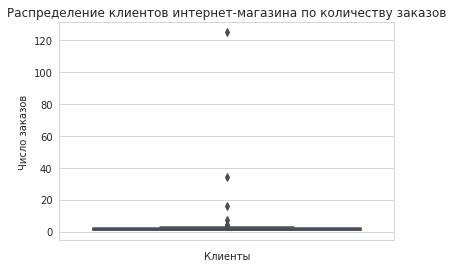

In [41]:
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.boxplot(y = 'order_id', data = df_m)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Клиенты',
        ylabel='Число заказов',
        title='Распределение клиентов интернет-магазина по количеству заказов')
plt.show()

<div class="alert alert-info">
   Диаграмма распределение клиентов по количеству заказов искажена из-за наличия клиента с очень большим числом 
заказов (более 120). Также несколько клиентов совершили более 5 заказов.  
</div>

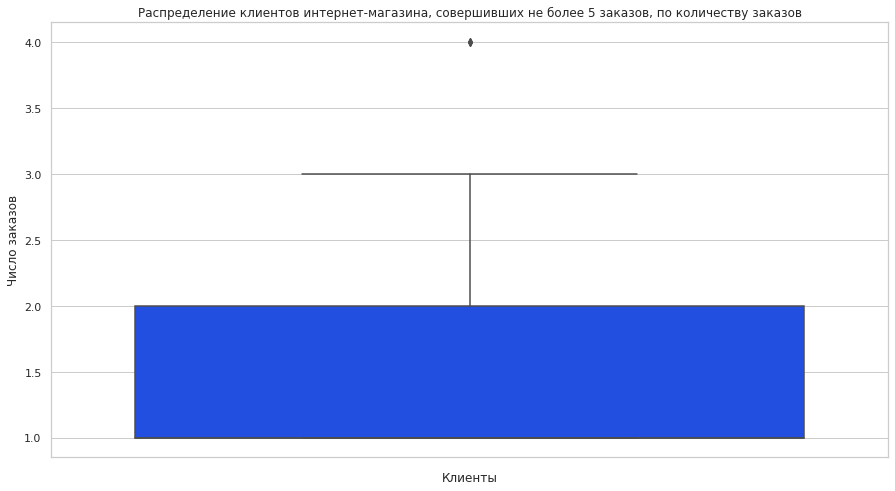

In [42]:
df_mm = df_m.query('order_id <= 5')
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.boxplot(y = 'order_id', data = df_mm)
sns.set(rc={'figure.figsize':(15,6)})
ax.set (xlabel='Клиенты',
        ylabel='Число заказов',
        title='Распределение клиентов интернет-магазина, совершивших не более 5 заказов, по количеству заказов')
plt.show()

<div class="alert alert-info">
   Медианное число заказов на 1 клиента интернет-магазина составляет 1. Менее 10 клиентов совершили более 3 покупок.
</div>

In [43]:
df_m['order_id'].describe()

count    2185.000000
mean        1.481922
std         2.802205
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       125.000000
Name: order_id, dtype: float64

<div class="alert alert-info">
   Среднее число заказов на 1 клиента (1,48) в 1,5 раза превышает медианное (1). Максимальное число заказов составляет 125. 
Данное распределение достаточно плотное, но имеет несколько выбросов с числом заказов более 3, что повышает среднее 
стандартное отклонение до 2,8. 
</div>

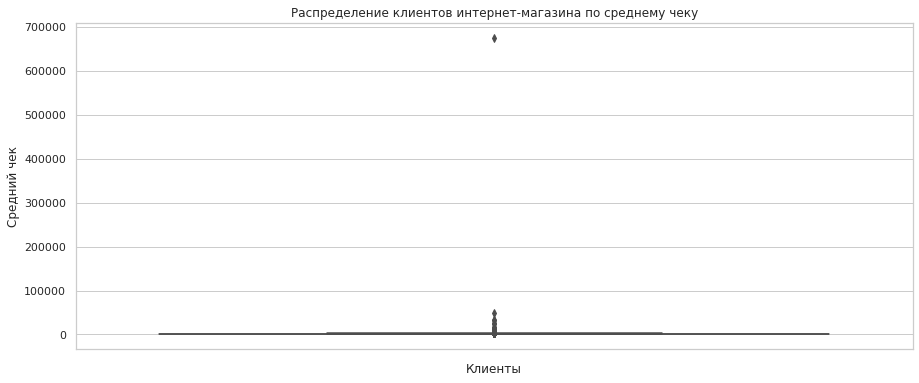

In [44]:
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.boxplot(y = 'mid_receipt', data = df_m)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Клиенты',
        ylabel='Средний чек',
        title='Распределение клиентов интернет-магазина по среднему чеку')
plt.show()

<div class="alert alert-info">
   Диаграмма распределения среднего чека также искажена из-за ранее выявленных клиентов с большим количеством заказов
(средний чек более 10000).
</div>

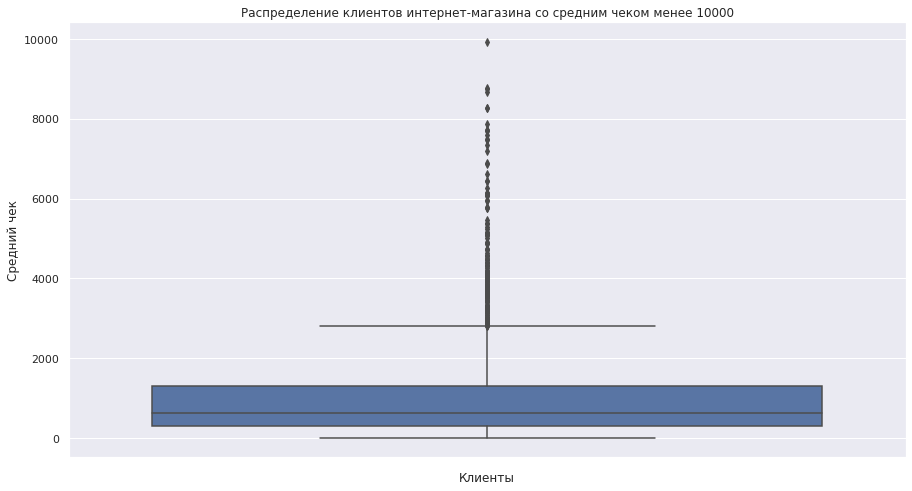

In [45]:
df_ms = df_m.query('mid_receipt <= 10000')
ax = sns.boxplot(y = 'mid_receipt', data = df_ms)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Клиенты',
        ylabel='Средний чек',
        title='Распределение клиентов интернет-магазина со средним чеком менее 10000')
plt.show()

<div class="alert alert-info">
   Диаграмма распределения среднего чека по очищенным данным (для клиентов со средним чеком менее 10000) показывает довольно
большое количество выбросов (средний чек более 2500), в то время, как медианный средний чек около 500. 
</div>

In [46]:
df_m['mid_receipt'].describe()

count      2185.000000
mean       1471.782191
std       14571.756218
min          15.000000
25%         300.000000
50%         637.000000
75%        1330.500000
max      675000.000000
Name: mid_receipt, dtype: float64

<div class="alert alert-info">
   Средняя величина 'среднего чека' (1472) почти в 2 раза превышает медианную (637) при весьма высоком стандартном отклонении
(14572). Это говорит о том, что распределение среднего чека имеет очень большой разброс - от 15 до 675000 и большое количество
выбросов с величиной чека более 2500.
</div>

<div class="alert alert-info">
  <b> Изучение структуры продаж интернет-магазина </b>
   <a id="start4"></a> 
</div>

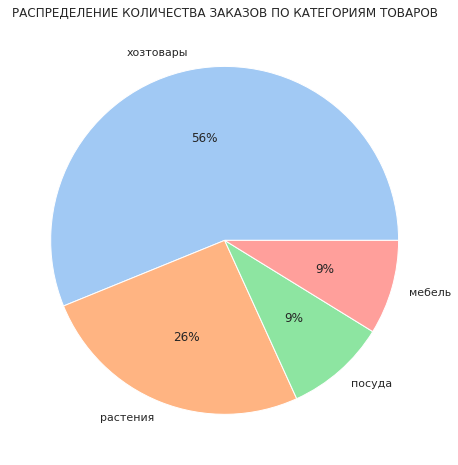

In [47]:
df_m = df.pivot_table(index = 'category', values = 'order_id', aggfunc = 'nunique').sort_values(by = 'order_id', ascending = False)
df_f = df.groupby('category', as_index = False)['order_id'].nunique().sort_values(by = 'order_id', ascending = False)
s = df_f['category'].unique()
sns.set(rc={'figure.figsize':(16,8)})
colors = sns.color_palette('pastel')[ 0:15 ]
labels = s
plt.pie(list(df_m['order_id']), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ЗАКАЗОВ ПО КАТЕГОРИЯМ ТОВАРОВ')
plt.show()

<div class="alert alert-info">
   Более 50 % всех продаж интернет-магазина приходится на хозтовары, товары для сада и огорода (растения) занимают 26 % продаж,
а посуда и мебель составляют по 9 % в структуре объемов продаж. 
</b>

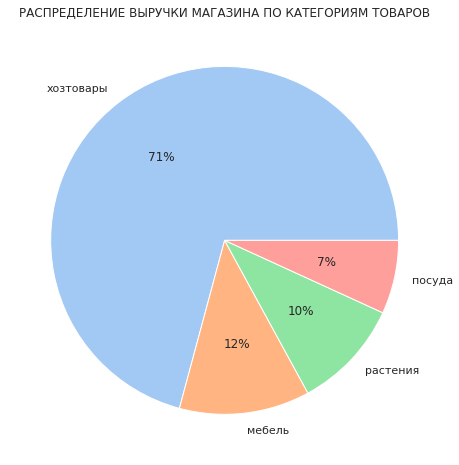

In [48]:
df_m = df.pivot_table(index = 'category', values = 'cost', aggfunc = 'sum').sort_values(by = 'cost', ascending = False)
df_f = df.groupby('category', as_index = False)['cost'].sum().sort_values(by = 'cost', ascending = False)
s = df_f['category'].unique()
sns.set(rc={'figure.figsize':(16,8)})
colors = sns.color_palette('pastel')[ 0:15 ]
labels = s
plt.pie(list(df_m['cost']), labels = labels, colors = colors, autopct='%.0f%%')
plt.title('РАСПРЕДЕЛЕНИЕ ВЫРУЧКИ МАГАЗИНА ПО КАТЕГОРИЯМ ТОВАРОВ')
plt.show()

<div class="alert alert-info">
   Наибольшую выручку магазину (72 %) приносят хозтовары, затем идет мебель (12 %), а посуда и растения приносят, соответственно,
7 и 10 % выручки. Таким образом, доля растений в выручке (10 %) существенно ниже их доли в общем количестве заказов (26 %). И, 
наоборот, доля мебели в общей выручке (12 %) выше, по с ее долей в общем количестве заказов (9 %). Скорее всего это связано с 
тем, что средняя цена одного предмета в категории 'мебель' существенно выше, по сравнению с ценой одной позиции в категории
'растения'. 
</b>

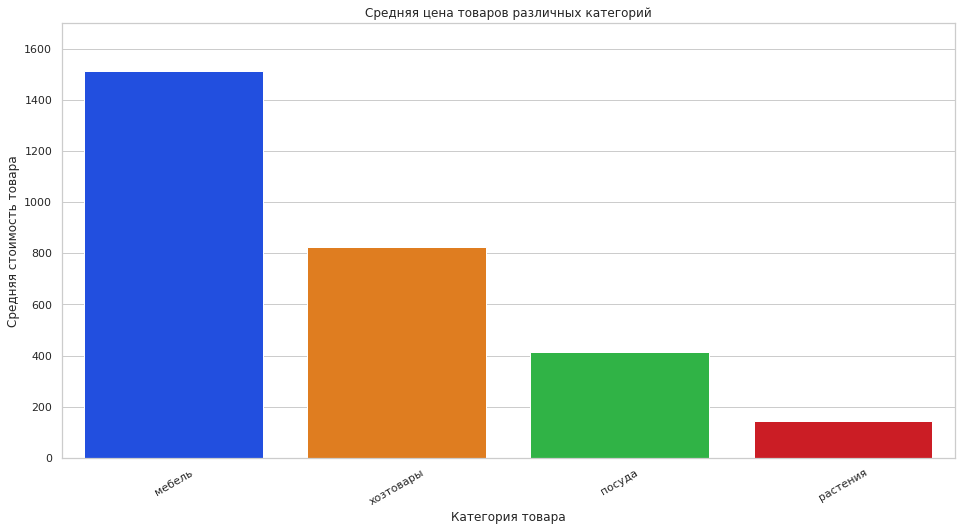

In [49]:
sns.set_style('whitegrid')
sns.set_palette('bright')
df_c = df.groupby('category', as_index = False)['price'].mean().sort_values(by = 'price', ascending = False)
ax = sns.barplot(x='category', y='price', data = df_c)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Категория товара',
        ylabel='Средняя стоимость товара',
        ylim = (0,1700),
        title='Средняя цена товаров различных категорий')  
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
   Товары категории 'мебель' имеют наибольшую среднюю цену (1500), далее идут хозтовары (около 800), посуда (около 400) и 
растения (около 150). 
</b>

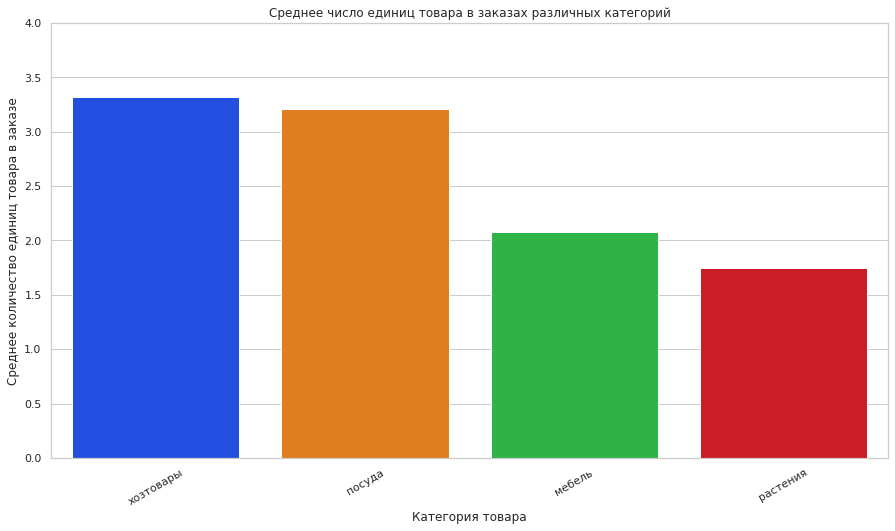

In [50]:
sns.set_style('whitegrid')
sns.set_palette('bright')
df_c = df.groupby('category', as_index = False)['quantity'].mean().sort_values(by = 'quantity', ascending = False)
ax = sns.barplot(x='category', y='quantity', data = df_c)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Категория товара',
        ylabel='Среднее количество единиц товара в заказе',
        ylim = (0,4),
        title='Среднее число единиц товара в заказах различных категорий')  
plt.xticks(rotation = 30)
plt.show()

<div class="alert alert-info">
   Больше всего предметов в одном заказе характерно для категорий хозтовары и посуда (около 3). Заказы категорий растения и 
мебель содержать в среднем около 2 позиций. 
</b>   

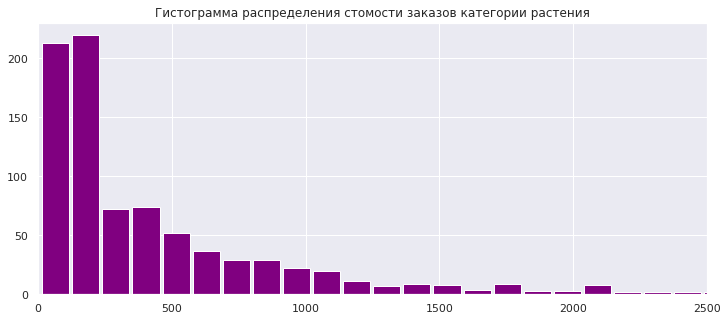

In [51]:
df.query('category == "растения"').groupby('order_id', as_index = False).agg({'cost':'sum'}).hist(column='cost', bins= 100 , grid= True , rwidth= .9 , color='purple', figsize = (12,5))
plt.title('Гистограмма распределения стомости заказов категории растения')
plt.xlim(0,2500);

<div class="alert alert-info">
   Около 50 % заказов категории 'растения' имеют стомость ниже 250. Менее 5 % заказов имеют стоимость выше 1000.
</b>  

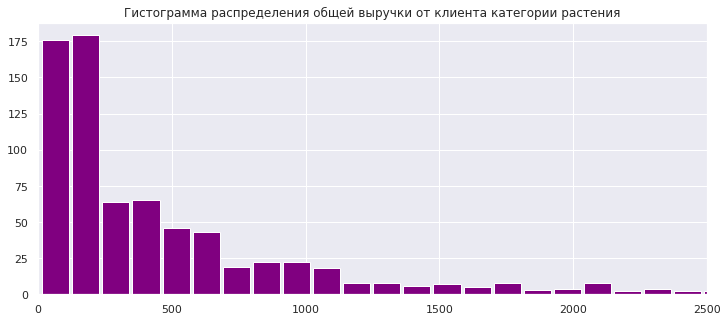

In [52]:
df.query('category == "растения"').groupby('customer_id', as_index = False).agg({'cost':'sum'}).hist(column='cost', bins= 100 , grid= True , rwidth= .9 , color='purple', figsize = (12,5))
plt.title('Гистограмма распределения общей выручки от клиента категории растения')
plt.xlim(0,2500);

<div class="alert alert-info">
   Около 50 % клиентов в категории 'растения' потратили на покупки менее 250. Менее 5 % клиентов тратят на растения более 1000.
</b>  

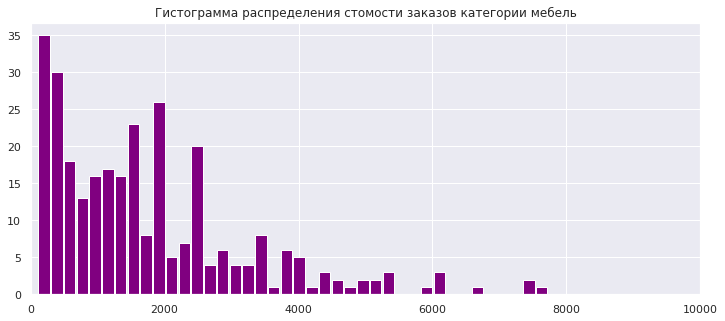

In [53]:
df.query('category == "мебель"').groupby('order_id', as_index = False).agg({'cost':'sum'}).hist(column='cost', bins= 40 , grid= True , rwidth= .9 , color='purple', figsize = (12,5))
plt.title('Гистограмма распределения стомости заказов категории мебель')
plt.xlim(0,10000);

<div class="alert alert-info">
   Порядка 90 % заказов категории 'мебель' имеют стоимость менее 4000. Около 1 % заказов имеют стоимость более 6000.
</b>  

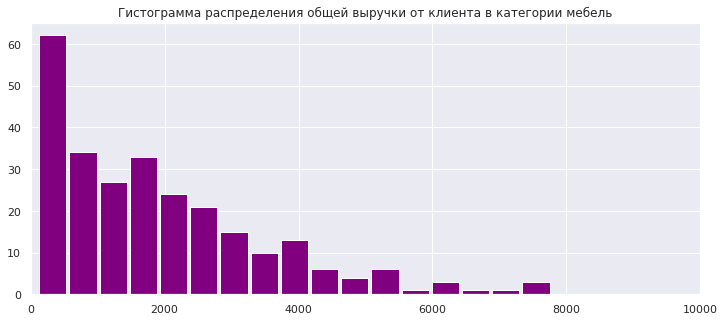

In [54]:
df.query('category == "мебель"').groupby('customer_id', as_index = False).agg({'cost':'sum'}).hist(column='cost', bins= 40 , grid= True , rwidth= .9 , color='purple', figsize = (12,5))
plt.title('Гистограмма распределения общей выручки от клиента в категории мебель')
plt.xlim(0,10000);

<div class="alert alert-info">
   Более 50 % клиентов категории 'мебель' потратили до 2000. Около 1 % клиентов потратили более 6000.
</b> 

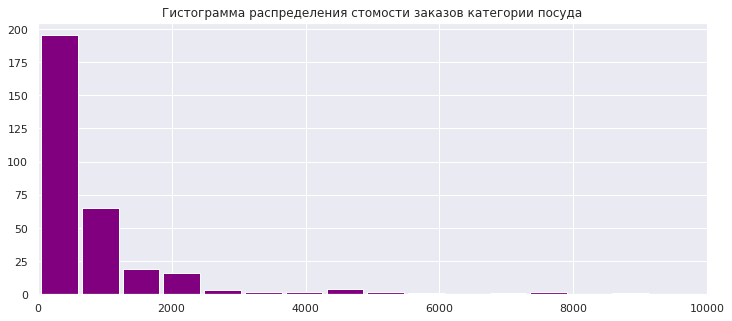

In [55]:
df.query('category == "посуда"').groupby('order_id', as_index = False).agg({'cost':'sum'}).hist(column='cost', bins= 40 , grid= True , rwidth= .9 , color='purple', figsize = (12,5))
plt.title('Гистограмма распределения стомости заказов категории посуда')
plt.xlim(0,10000);

<div class="alert alert-info">
   Более 90 % заказов категории 'посуда' приносят выручку менее 2000. Доли процена занимают заказы стоимостью от 4000 до 8000. 
</b>  

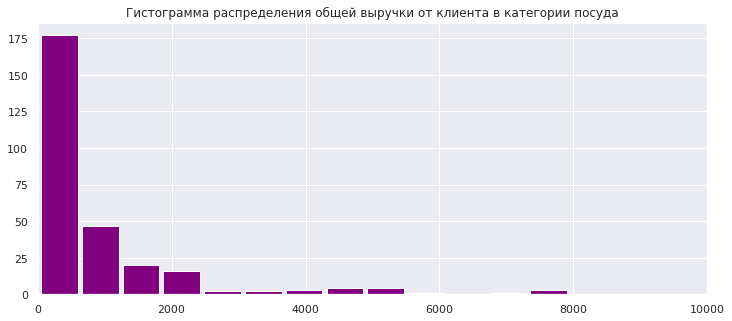

In [56]:
df.query('category == "посуда"').groupby('customer_id', as_index = False).agg({'cost':'sum'}).hist(column='cost', bins= 40 , grid= True , rwidth= .9 , color='purple', figsize = (12,5))
plt.title('Гистограмма распределения общей выручки от клиента в категории посуда')
plt.xlim(0,10000);

<div class="alert alert-info">
   Более 90 % клиентов категории 'посуда' потратили не более 2000. Доли процена занимают клиенты, потратившие от 4000 до 8000. 
</b>  

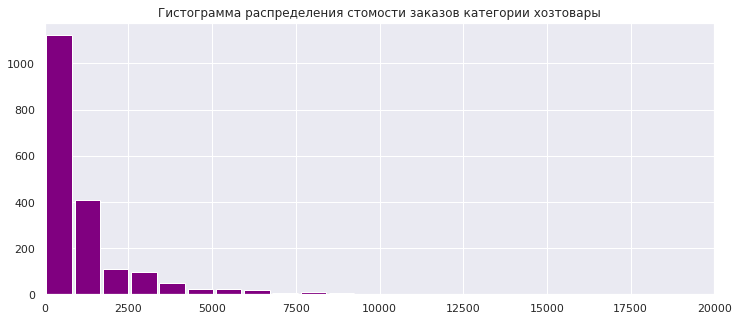

In [57]:
df.query('category == "хозтовары"').groupby('order_id', as_index = False).agg({'cost':'sum'}).hist(column='cost', bins= 800, grid= True , rwidth= .9 , color='purple', figsize = (12,5))
plt.title('Гистограмма распределения стомости заказов категории хозтовары')
plt.xlim(0,20000);

<div class="alert alert-info">
    Около 90 % заказов категории 'хозтовары' приносят выручку менее 2500. Доли процента занимают заказы стоимостью выше 5000.  
</b>

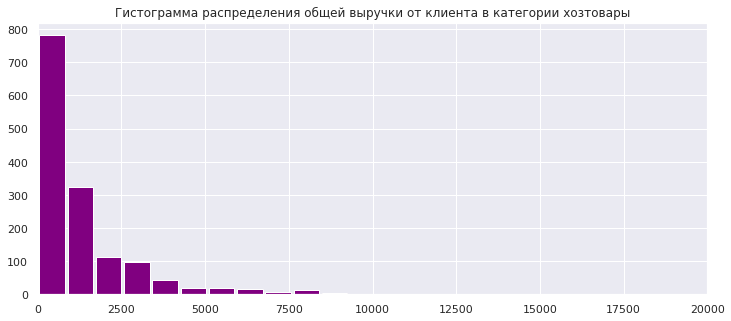

In [58]:
df.query('category == "хозтовары"').groupby('customer_id', as_index = False).agg({'cost':'sum'}).hist(column='cost', bins= 800, grid= True , rwidth= .9 , color='purple', figsize = (12,5))
plt.title('Гистограмма распределения общей выручки от клиента в категории хозтовары')
plt.xlim(0,20000);

<div class="alert alert-info">
    Около 90 % клиентов категории 'хозтовары' потратили не более 2500. Доли процента клиентов потратили выше 5000.  
</b>

<div class="alert alert-info">
  <b> Распределение среднего чека клиентов интернет-магазина по категориям </b>
   <a id="start5"></a> 
</div>

In [59]:
df_s = df.groupby(['category', 'customer_id'], as_index = False).agg({'order_id':'nunique', 'cost':'sum'})
df_s['mid_receipt'] = df_s['cost']/df_s['order_id']

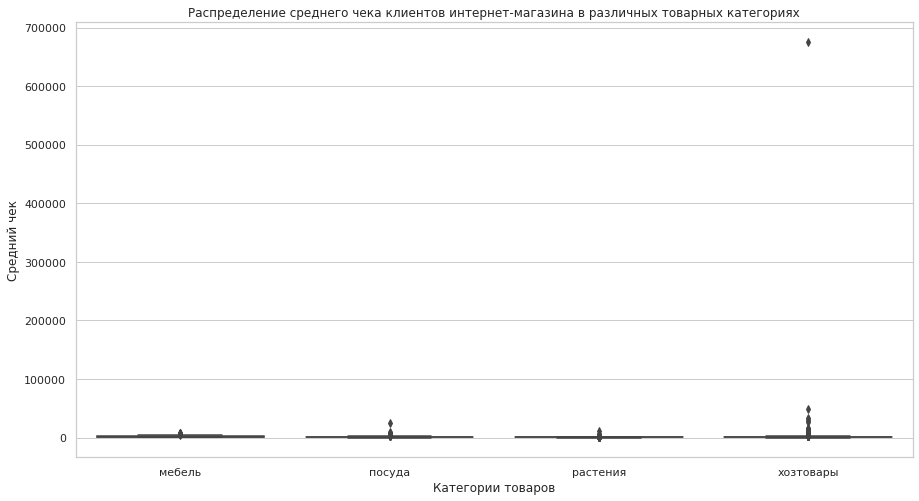

In [60]:
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.boxplot(y = 'mid_receipt', x = 'category', data = df_s)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Категории товаров',
        ylabel='Средний чек',
        title='Распределение среднего чека клиентов интернет-магазина в различных товарных категориях')
plt.show()

<div class="alert alert-info">
    Диаграммы распределения среднего чека клиентов неинформативны из-за наличия аномально высоких чеков от 10000 до 650000 в 
категории 'хозтовары'
</b>

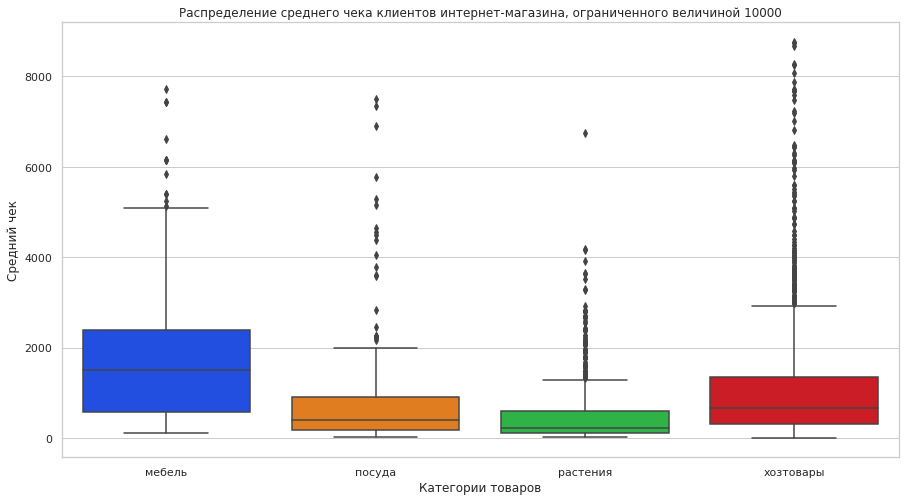

In [61]:
df_ss = df_s.query('mid_receipt < 10000')
sns.set_style('whitegrid')
sns.set_palette('bright')
ax = sns.boxplot(y = 'mid_receipt', x = 'category', data = df_ss)
sns.set(rc={'figure.figsize':(15,8)})
ax.set (xlabel='Категории товаров',
        ylabel='Средний чек',
        title='Распределение среднего чека клиентов интернет-магазина, ограниченного величиной 10000')
plt.show()

<div class="alert alert-info">
    Распределение среднего чека клиентов по очищенным данным показывает, что медианный средний чек уменьшается в ряду
категорий 'мебель' - 'хозтовары' - 'посуда' - 'растения'. Наибольшее число выбросов со средним чеком более 3000 имеет 
категория 'хозтовары' (в том числе, и аномально высокоий средний чек около 700000). Категории 'мебель', 'посуда' и 'растения' 
имеют также достаточно много выбросов со средним чеком, соответственно, более 5000, более 1000 и более 1000. 
</b>

In [62]:
w = []
w1 = []
for i in df['category'].unique():
    a, b, c, d, e, f, g, h = df_s.loc[df_s['category'] == i]['mid_receipt'].describe()
    w.append(b)
    w1.append(f)

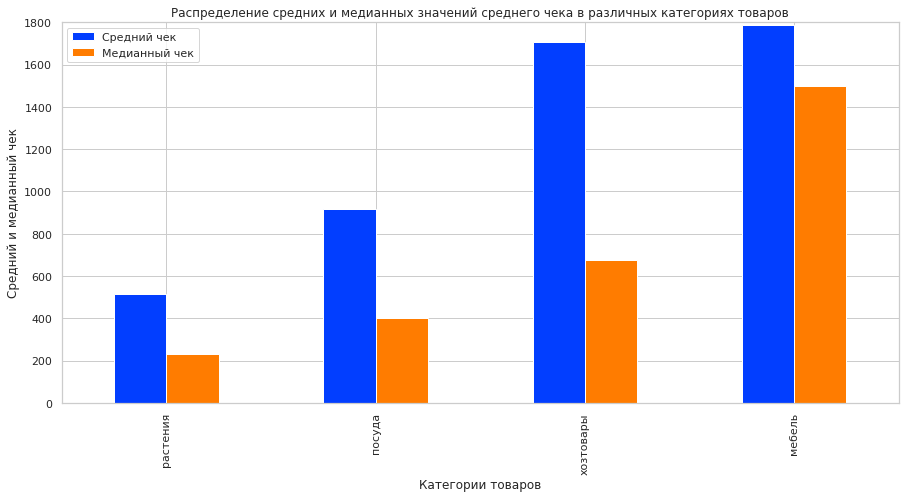

In [63]:
df_e = pd.DataFrame({'category':df['category'].unique(), 'mean':w, 'medium':w1}) 
sns.set_style('whitegrid')
sns.set_palette('bright')
df_e.pivot_table(index = 'category', values = ['mean', 'medium'], aggfunc = 'mean').sort_values(by = 'mean').plot(kind='bar', figsize = (15,7), ylim = (0,1800), title = 'Распределение средних и медианных значений среднего чека в различных категориях товаров',
                                                    xlabel = 'Категории товаров', ylabel = 'Средний и медианный чек', label = 'Стоимость чашки капучино');
plt.legend(['Средний чек', 'Медианный чек']);


<div class="alert alert-info">
    Среднее и медианное значения 'среднего чека' увеличиваются в ряду категорий товаров: растения - посуда - хозтовары - мебель.
В категориях растения, посуда и хозтовары среднее значение данного фактора более, чем в 2 раза превосходит медианное значение,
что свидетельствует о большом количестве выбросов в распределении среднего чека по данным категориям. Меньше всего выбросов в 
категории мебель, где среднее значение параметра 'средний чек' превышает медианное значение менее, чем на 20 %. 
</b>

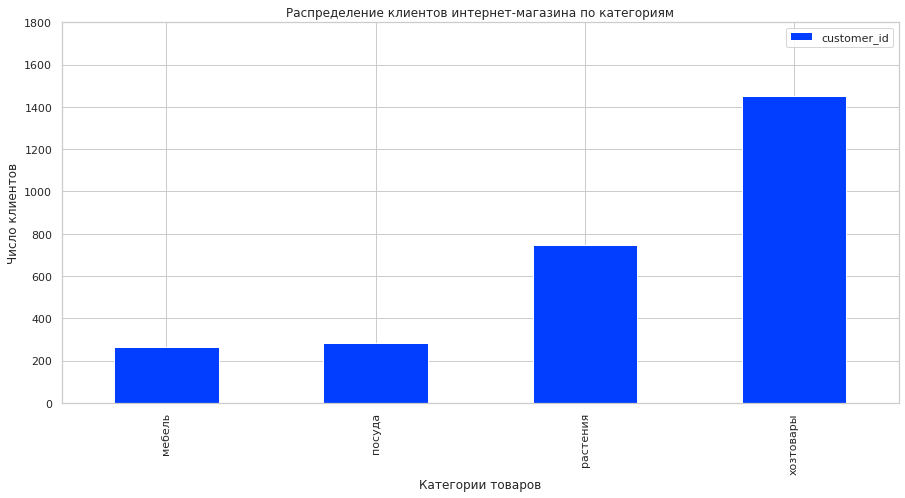

In [64]:
sns.set_style('whitegrid')
sns.set_palette('bright')
df_s.pivot_table(index = 'category', values = 'customer_id', aggfunc = 'nunique').sort_values(by = 'customer_id').plot(kind='bar', figsize = (15,7), ylim = (0,1800), title = 'Распределение клиентов интернет-магазина по категориям',
                                                    xlabel = 'Категории товаров', ylabel = 'Число клиентов');

<div class="alert alert-info">
    Меньше всего клиентов интернет-магазина находятся в товарной категории 'мебель', не смотря на то, что именно эта категория
обеспечивает максимальное значение среднего чека. Больше всего клиентов вполне ожидаемо в категории 'хозтовары', 
средняя выручка от которой уступает категории 'мебель'. На втором месте по числу клиентов располагается категория 'растения', 
которая характеризуется минимальным значением среднего чека. Таким образом, обозначается проблема клиентского дисбаланса, когда 
клиенты приносящие наибольшую выручку (категория 'мебель') находятся в меньшинстве, в то время, как низкоприбыльные клиенты
(из категории 'растения') непропорционально многочисленны. Количество клиентов категории 'хозтовары' также находится в 
дисбалансе со своей средней выручкой, так как относительно высокую величину среднего чека клиентов данной категории обеспечивает 
наличие выбросов с аномально высокми значениями среднего чека выше 10000, в  том числе, присутствие в данного категории клиента
со средним чеком около 700000. 
</b>

<div class="alert alert-info">
  <b> Когортный анализ клиентов интернет-магазина </b>
   <a id="start6"></a> 
</div>

In [65]:
prof = df.groupby('customer_id', as_index = False).agg({'date':'min'})
prof = prof.rename(columns = {'date':'first_date'})

In [66]:
df_u = prof.merge(df, on='customer_id', how="outer")

In [67]:
df_u['first_date'] = df_u['first_date'].astype("datetime64[M]")

In [68]:
df_uu = df_u.pivot_table(index = 'first_date', columns = 'category', values = 'customer_id', aggfunc = 'nunique')

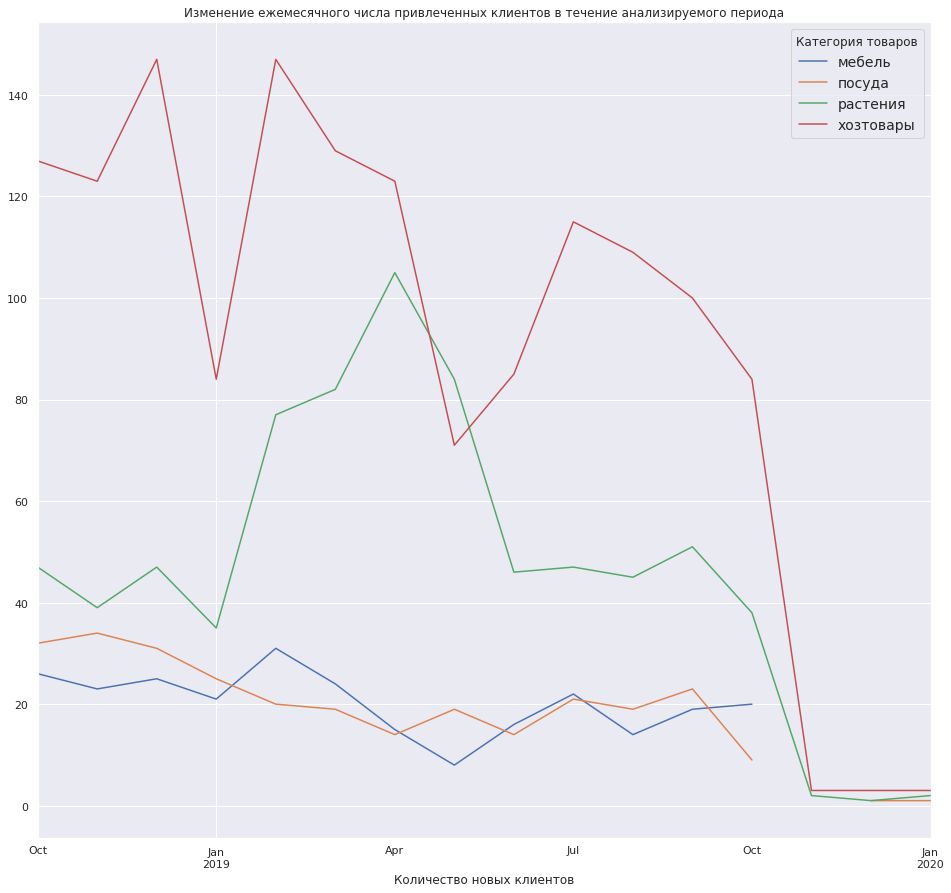

In [69]:
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,15)})
df_uu.plot(grid=True)
plt.xlabel('Дата привлечения новых клиентов, мес')
plt.xlabel('Количество новых клиентов')
plt.title('Изменение ежемесячного числа привлеченных клиентов в течение анализируемого периода')
plt.legend(loc = 'upper right', title = 'Категория товаров', fontsize = 14);

<div class="alert alert-info">
    В течение исследуемого периода (10.2018 - 10.2019) количества ежемесячно привлеченных новых клиентов в категориях
'посуда' и 'мебель' оставались примерно равными и постепенно снижались от 25-30 чел/мес до 15 - 20 чел/мес. Число привлеченных
клиентов в категории 'растения' за весь период превышало первые 2 категории; в 'растениях' наблюдается выраженный максимум 
притока новых клиентов (до 100 чел/мес) с марта по июнь 2019, связанный, вероятно, с сезонной востребованностью товаров данной 
категории. Наибольшее количество ежемесячно привлеченных новых клиентов было в категории 'хозтовары', однако, их число 
претерпевало существенные колебания и, в целом, в указанный период последовательно снижалось от 130 - 150 чел/мес 
до 80-100 чел/мес. 
</b>

In [70]:
df_u['lifetime'] = ((df_u['date'] - df_u['first_date'])/np.timedelta64(1, 'M'))
df_u['lifetime'] = df_u['lifetime'].astype(int)
df_u = df_u.query('first_date <= "2019-10-01"')

In [71]:
df_uw = df_u.pivot_table(index = 'first_date', columns = 'lifetime', values = 'customer_id', aggfunc = 'nunique')

In [72]:
df_uw[1] = df_uw[1].fillna(0)
df_uw['rr_1'] = df_uw[1]*100/df_uw[0]

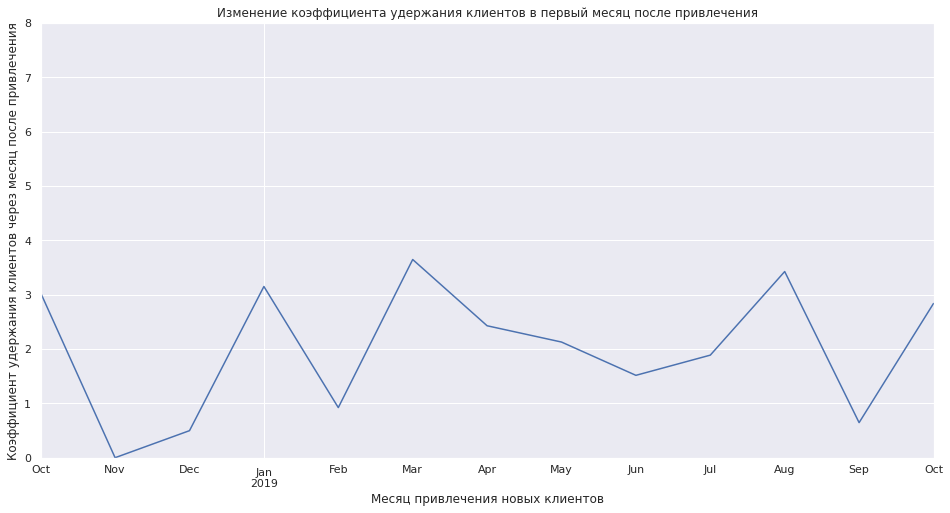

In [73]:
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,8)})
df_uw['rr_1'].plot(grid=True)
plt.ylim(0,8)
plt.xlabel('Месяц привлечения новых клиентов')
plt.ylabel('Коэффициент удержания клиентов через месяц после привлечения')
plt.title('Изменение коэффициента удержания клиентов в первый месяц после привлечения');

<div class="alert alert-info">
    Для изучения динамики удержания клиентов интернет-магазина исходный датафрейм был сгруппирован в когорты по датам 
привлечения новых клиентов и разбит на месячные лайф-таймы. Были рассчитаны коэффициенты удержания для разных когорт
в первый месяц (первый лайф-тайм) после месяца образования когорты. Обращает внимание чрезвычайно низкое удержание клиентов,
когда на второй месяц после образования когорты коэффициенты удержания для всех когорт практически близки к нулю. Величина
месячного коэффициента удержания для всех когорт не превышает 5 %. Наибольшие значения коэффициента удержания (3,5 - 4 %) были
достигнуты для когорт, образованных в середине исследуемого периода (03.2019 - 05.2019). Для когорт, образованных в конце 
наблюдаемого периода (08.2019 - 10.2019) месячный коэф удержания не превышал 2,8 %. 
</b>

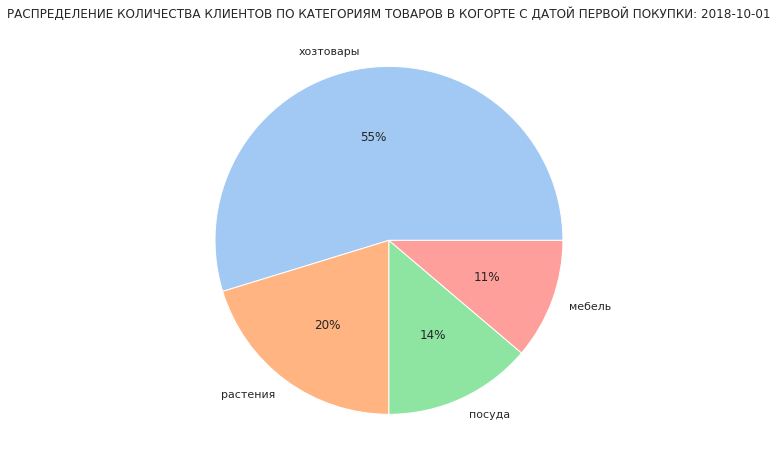

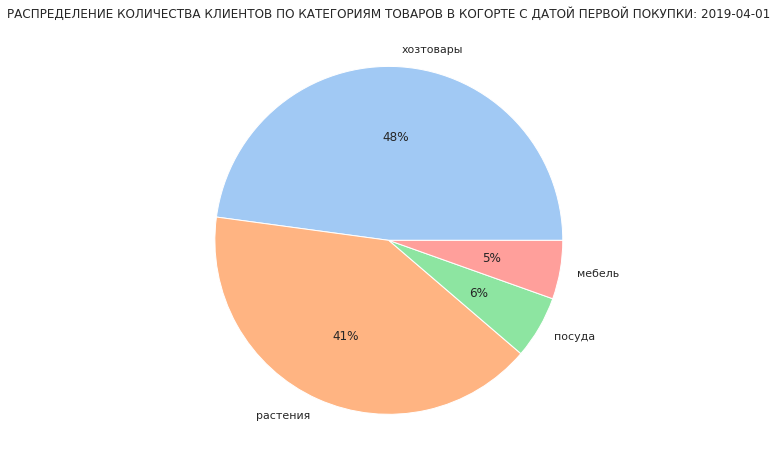

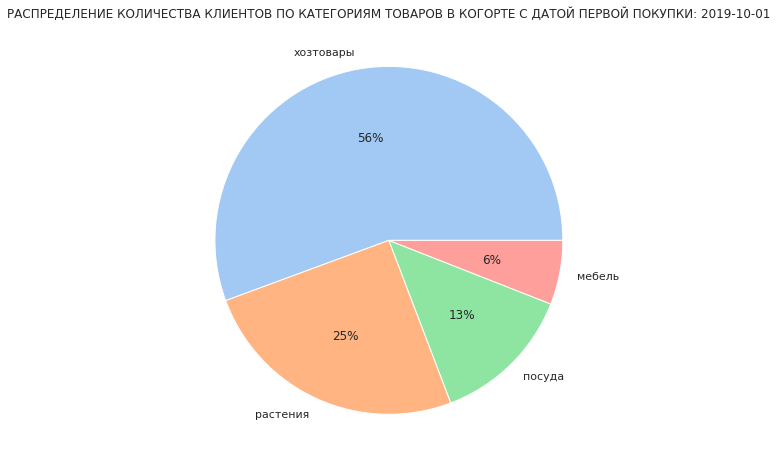

In [74]:
date = ['2018-10-01','2019-04-01','2019-10-01']
for i in date:
    df_m = df_u.loc[df_u['first_date'] == i].pivot_table(index = 'category', values = 'customer_id', aggfunc = 'nunique').sort_values(by = 'customer_id', ascending = False)
    df_f = df.groupby('category', as_index = False)['customer_id'].nunique().sort_values(by = 'customer_id', ascending = False)
    s = df_f['category'].unique()
    sns.set(rc={'figure.figsize':(16,8)})
    colors = sns.color_palette('pastel')[ 0:15 ]
    labels = s
    plt.pie(list(df_m['customer_id']), labels = labels, colors = colors, autopct='%.0f%%')
    plt.title('РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА КЛИЕНТОВ ПО КАТЕГОРИЯМ ТОВАРОВ В КОГОРТЕ С ДАТОЙ ПЕРВОЙ ПОКУПКИ: {}'.format(i))
    plt.show()

<div class="alert alert-info">
    Для исследования изменения товарной структуры покупок были построены круговые диаграммы количества клиентов в когортах, 
сформированных в начале (2018-10-01), середине (2019-04-01) и конце (2019-10-01) исследуемого периода. В течение года 
доли заказов на посуду и мебель немного снизились от 14 до 13 % и от 11 до 6 %, соответственно, а доля растений, 
увеличившись в середине цикла (сезонный эффект) до 42 %, к концу цикла (2019-10-01) составила 25 %, что на 5 % больше, чем для
прошлогодней когорты (от 2018-10-01). Соответственно, рост доли заказов на растения с 20 до 25 % произошел за счет снижения 
доли мебели с 11 до 6 %. Доля клиентов в хозтоварах в начале и конце цикла практически не изменилась и составила 55 % (в начале)
и 56 % (в конце). 
</div>

<div class="alert alert-info">
  <b> Статистическое сравнение распределений выручки от одного клиента в разных категориях товаров</b>
   <a id="start7"></a> 
</div>

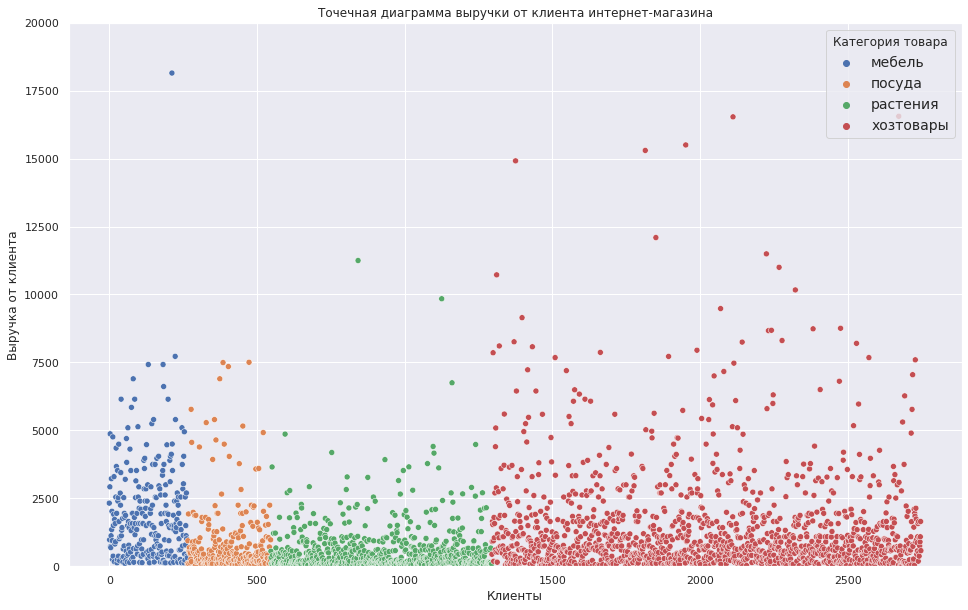

In [75]:
df_v = df.groupby(['category','customer_id'], as_index = False).agg({'cost':'sum'})
df_v['number'] = range(len(df_v['customer_id']))
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,10)})  
ax = sns.scatterplot(data=df_v, x = 'number', y="cost", hue = 'category')
plt.legend(loc = 'upper right', title = 'Категория товара', fontsize = 14)
ax.set (xlabel='Клиенты',
        ylabel='Выручка от клиента', ylim=(0,20000),
        title='Точечная диаграмма выручки от клиента интернет-магазина')
pd.options.mode.chained_assignment = None;

<div class="alert alert-info">
  Точечная диаграмма распределения выручки от клиента интернет-магазина имеет максимальную плотность в интервале
0 - 2500. При этом, для всех категорий товаров имеется довольно много точек с выручкой, превышающей 5000.  
</div>

In [76]:
perc = []
for i in df_v['category'].unique():
    perc.append([np.percentile(df_v.loc[df_v['category'] == i]['cost'], [95, 97.5, 99]), i])
perc

[[array([5128.4, 6149. , 7424. ]), 'мебель'],
 [array([4372.7  , 5395.225, 7497.9  ]), 'посуда'],
 [array([2145.3  , 2849.675, 4051.67 ]), 'растения'],
 [array([ 5203. ,  7560.1, 11237.6]), 'хозтовары']]

<div class="alert alert-info">
  Для очистки данных для всех категорий заказов были рассчитаны верхние перцентили, которые показывают, что
выручка от клиента в категори 'хозтовары' размыта в менее широких пределах, по сравнению с другими категориями товаров. 
Для удаления выбросов из данных целесообразно убрать точки, лежащие выше перцентиля 95%.
</div>

In [77]:
df_r = df_v.loc[(df_v['category'] == 'растения') & (df_v['cost'] < perc[2][0][0])]

In [78]:
len(df_v.loc[df_v['category'] == 'растения']) - len(df_r)

38

In [79]:
df_h = df_v.loc[(df_v['category'] == 'хозтовары') & (df_v['cost'] < perc[3][0][0])]

In [80]:
len(df_v.loc[df_v['category'] == 'хозтовары']) - len(df_h)

73

In [81]:
df_p = df_v.loc[(df_v['category'] == 'посуда') & (df_v['cost'] < perc[1][0][0])]

In [82]:
len(df_v.loc[df_v['category'] == 'посуда']) - len(df_p)

15

In [83]:
df_m = df_v.loc[(df_v['category'] == 'мебель') & (df_v['cost'] < perc[0][0][0])]

In [84]:
len(df_v.loc[df_v['category'] == 'мебель']) - len(df_m)

14

<div class="alert alert-info">
  После очистки данных были исключены выбросы, имеющие стоимость заказов выше перцентиля 95%. 
</div>

In [85]:
st.mannwhitneyu(df_m['cost'],df_p['cost'],True,'two-sided').pvalue

1.3616053985757669e-25

In [86]:
st.mannwhitneyu(df_m['cost'],df_p['cost'],True,'less').pvalue

1.0

In [87]:
st.mannwhitneyu(df_m['cost'],df_p['cost'],True,'greater').pvalue

6.808026992878834e-26

<div class="alert alert-info">
  Формулировка гипотез: H0: ген совокупности А и В выручки от клиента категорий 'мебель' и 'посуда' равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
  Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей выручки от клиента
показывает, что совокупность выручки от клиента в категории 'мебель' больше совокупности выручки от клиента в категории
'посуда'.
</div>

In [88]:
st.mannwhitneyu(df_h['cost'],df_m['cost'],True,'two-sided').pvalue

7.788100982556867e-14

In [89]:
st.mannwhitneyu(df_h['cost'],df_m['cost'],True,'less').pvalue

3.8940504912784333e-14

In [90]:
st.mannwhitneyu(df_h['cost'],df_m['cost'],True,'greater').pvalue

0.9999999999999611

<div class="alert alert-info">
   Формулировка гипотез: H0: ген совокупности А и В выручки от клиента категорий 'хозтовары' и 'мебель' равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
   Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей выручки от клиента
показывает, что совокупность клиентской выручки в категории 'мебель' больше совокупности выручки в категории 'хозтовары'.
</div>

In [91]:
st.mannwhitneyu(df_h['cost'],df_p['cost'],True,'two-sided').pvalue

5.547422249127307e-13

In [92]:
st.mannwhitneyu(df_h['cost'],df_p['cost'],True,'less').pvalue

0.9999999999997229

In [93]:
st.mannwhitneyu(df_h['cost'],df_p['cost'],True,'greater').pvalue

2.7737111245636536e-13

<div class="alert alert-info">
   Формулировка гипотез: H0: ген совокупности А и В выручки от клиента категорий 'хозтовары' и 'посуда' равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
   Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей выручки от клиента
показывает, что совокупность клиентской выручки в категории 'хозтовары' больше совокупности выручки категории 'посуда'.
</div>

<div class="alert alert-info">
   Таким образом, статистические расчеты сравнения выручки от клиента в раличных категориях товаров по очищенным данным
показывают, что совокупность клиентов категории 'мебель' приносит наибольшую выручку; ей уступает совокупность клиентов
категории 'хозтовары', которая, в свою очередь, превосходит выручку от клиентов категории 'посуда'. Наименьшую выручку
приносят клиенты категории 'растения'.
</div>

<div class="alert alert-info">
  <b> Кластеризация заказов интернет-магазина </b>
   <a id="start8"></a> 
</div>

In [94]:
prof_ = df_u.groupby('customer_id', as_index = False).agg({'date':'max'})
prof_ = prof_.rename(columns = {'date':'max_date'})
df_u0 = prof_.merge(df_u, on='customer_id', how="outer")

In [95]:
df_u0['lifetime'] = ((df_u0['max_date'] - df_u0['first_date'])/np.timedelta64(1, 'M'))
df_u0['lifetime'] = df_u0['lifetime'].astype(int)

<div class="alert alert-info">
  Для каждого клиента нашли максимальный лайф-тайм (поле 'lifetime'): разница в месяцах между датами первой и последней покупок.
</div>

In [96]:
df_w = df_u.groupby('customer_id', as_index = False).agg({'order_id':'nunique'})
df_w = df_w.rename(columns = {'order_id':'order_1'})
df_ww = df_u.groupby('customer_id', as_index = False).agg({'order_id':'count'})
df_ww = df_ww.rename(columns = {'order_id':'order_2'})
df_www = df_w.merge(df_ww, on = 'customer_id', how = 'outer')
df_www['ratio'] = df_www['order_2']/df_www['order_1'] 
df_u1 = df_u0.merge(df_www, on = 'customer_id', how = 'outer')

In [97]:
df_u1 = df_u1.drop(['order_1', 'order_2'], axis = 1)

<div class="alert alert-info">
  Для каждого клиента нашли среднее число позиций в заказе (поле 'ratio'): отношение общего числа позиций к числу заказов. 
</div>

In [98]:
df_w = df_u.groupby('customer_id', as_index = False).agg({'order_id':'nunique'})
df_w = df_w.rename(columns = {'order_id':'order_1'})
df_ww = df_u.groupby('customer_id', as_index = False).agg({'quantity':'sum'})
df_ww = df_ww.rename(columns = {'quantity':'quantity_1'})
df_www = df_w.merge(df_ww, on = 'customer_id', how = 'outer')
df_www['quantity_per_order'] = df_www['quantity_1']/df_www['order_1'] 
df_u2 = df_u1.merge(df_www, on = 'customer_id', how = 'outer')
df_u2 = df_u2.drop(['order_1', 'quantity_1'], axis = 1)

<div class="alert alert-info">
  Для каждого клиента нашли среднее число единиц товара в заказе (поле 'quantity_per_order'): отношение общего числа единиц
товара к числу заказов. 
</div>

In [99]:
def s(a):
    if a == 'растения':
        return 1
    elif a == 'посуда':
        return 2
    elif a == 'хозтовары':
        return 3
    else: 
        return 4
df_u2['category_'] = df_u2['category'].apply(s)
df_u2['first_month'] = df_u2['first_date'].dt.month
df_u2['last_month'] = df_u2['max_date'].dt.month

<div class="alert alert-info">
   В дата-фрейме категории и даты первой и последней покупок перевели в цифровую форму. 
</div>

In [100]:
df_m = df_u2.groupby('customer_id', as_index = False).agg({'order_id':'nunique', 'cost':'sum'})
df_m['mid_receipt'] = df_m['cost']/df_m['order_id']
df_m = df_m.drop(['order_id','cost'], axis = 1)
df_u3 = df_u2.merge(df_m, on = 'customer_id', how = 'outer')

In [101]:
df_e = df_u3.groupby('customer_id', as_index = False).agg({'first_month':'mean','last_month':'mean','cost':'sum','ratio':'mean','quantity_per_order':'mean', 'category_':'median', 'lifetime':'mean','mid_receipt':'median', 'order_id':'nunique'})

<div class="alert alert-info">
   Для кластеризации с целью выявления профилей клиентов подготовлена сводная таблица, в которой каждый клиент охарактеризован
следующими признаками: месяц первой покупки (first_month), месяц последней покупки (last_month), общие траты (cost), среднее
число позиций в заказе (ratio), среднее количество предметов (единиц товара) в заказе (quantity_per_order), предпочтительная
категория товароа (category_), максимальный лайф-тайм (lifetime), средний чек (mid_receipt) и общее число заказов (order_id).
</div>

In [102]:
df_t = df_e.drop('customer_id', axis = 1)

In [103]:
df_t[:10]

,first_month,last_month,cost,ratio,quantity_per_order,category_,lifetime,mid_receipt,order_id
0,10,10,555.0,4.0,4.0,1.0,0,555.0,1
1,2,2,442.0,1.0,1.0,3.0,0,442.0,1
2,10,10,914.0,1.0,2.0,3.0,0,914.0,1
3,1,1,1649.0,1.0,1.0,3.0,0,1649.0,1
4,9,9,2324.0,1.0,2.0,4.0,0,2324.0,1
5,1,1,1536.0,1.0,12.0,3.0,0,1536.0,1
6,10,11,7857.0,1.0,1.5,3.0,13,3928.5,2
7,10,10,937.0,1.0,1.0,3.0,0,937.0,1
8,2,12,321.0,1.0,1.0,1.0,10,160.5,2
9,2,12,213.0,1.0,1.0,1.5,10,106.5,2


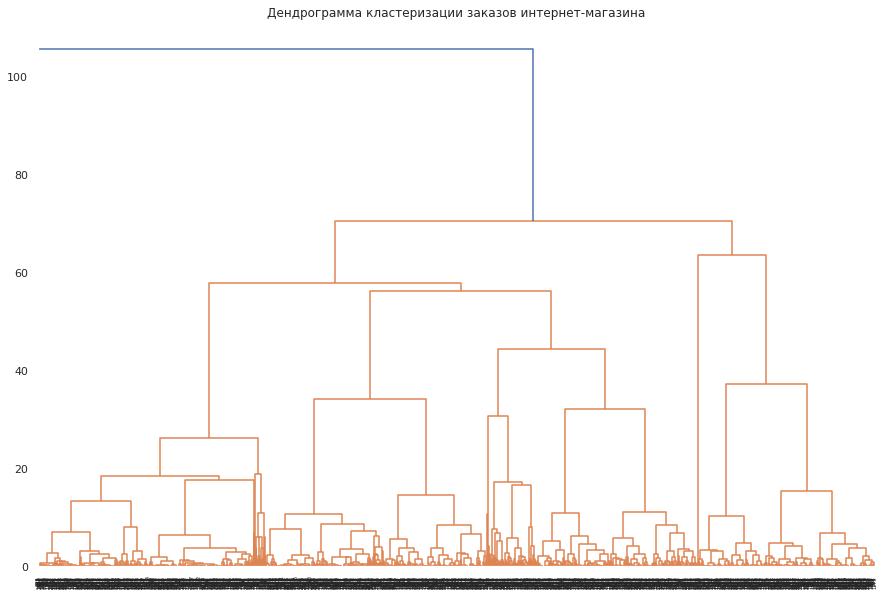

In [104]:
scaler = StandardScaler()
X_st = scaler.fit_transform(df_t)
linked = linkage(X_st, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма кластеризации заказов интернет-магазина')
plt.show() 

<div class="alert alert-info">
    Построенная дендрограмма показывает, что датафрейм заказов содержит 2 основных кластера, один из которых делится еще
на 4 подкоастера, а другой - на 2. Таким образом, при использовании метода кластеризации K-Means логично использовать разделение 
на 6 кластеров.
</div>

In [105]:
mod_clusters = KMeans(n_clusters=6, random_state=0)
m_clusters = mod_clusters.fit_predict(X_st)
df_t['cluster'] = m_clusters

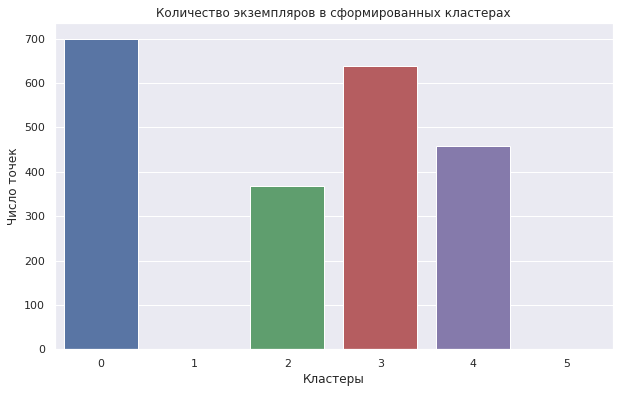

In [106]:
c = list(df_t.columns)
X_count = df_t.groupby('cluster', as_index = False).agg({c[0]:'count'})
plt.figure(figsize=(10, 6))
sns.barplot(x = 'cluster', y = c[0], data = X_count)
plt.title('Количество экземпляров в сформированных кластерах')
plt.ylabel('Число точек')
plt.xlabel('Кластеры')
plt.show()

<div class="alert alert-info">
   Больше всего точек содержит кластер '0', далее идут кластеры '3', '4' и '2'. В кластерах '1' и '5' элеменетов практически нет.
По сути, произошло разделение на 4 кластера.
</div>

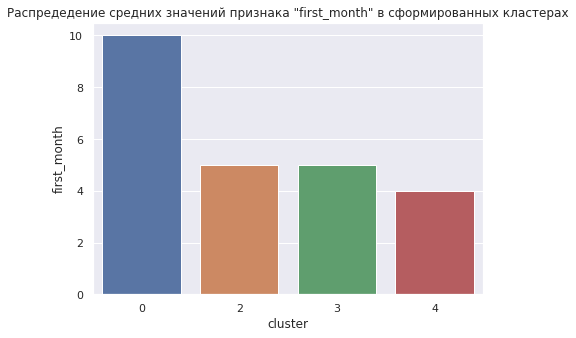

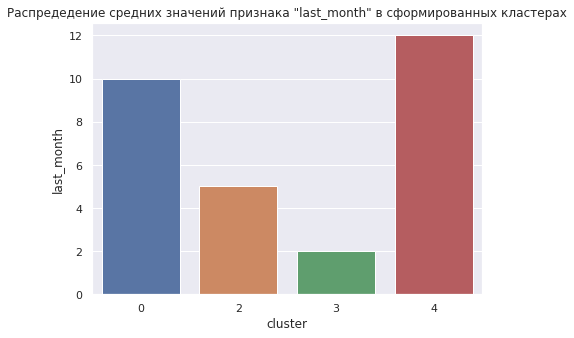

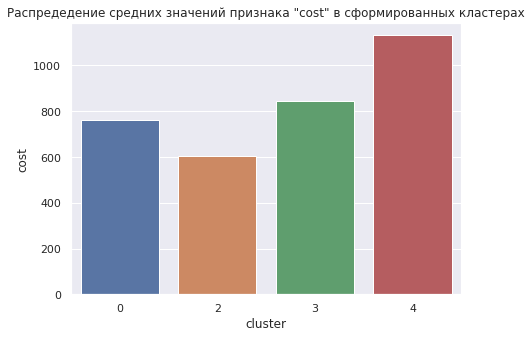

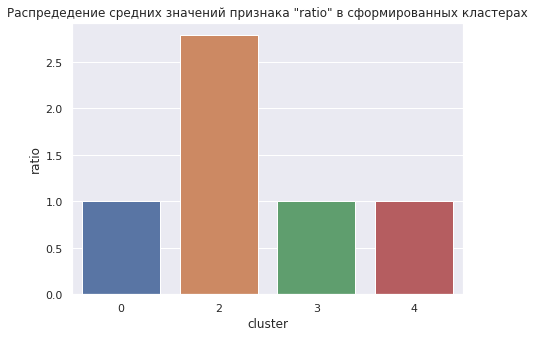

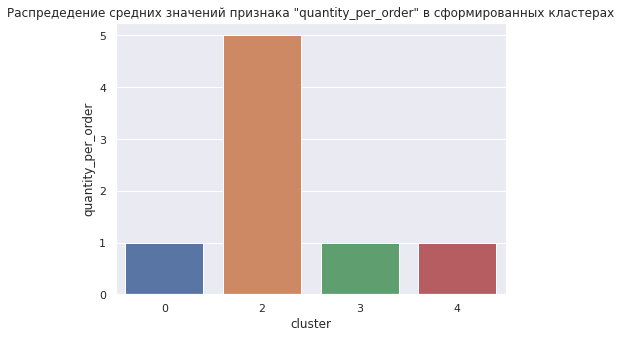

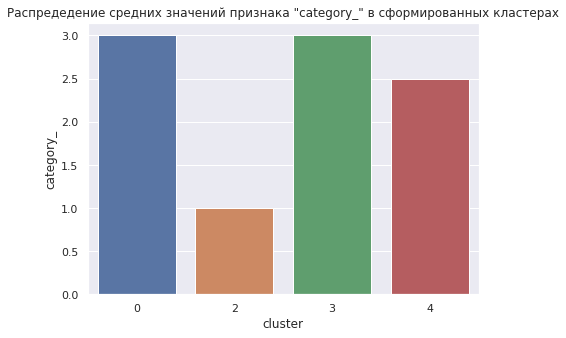

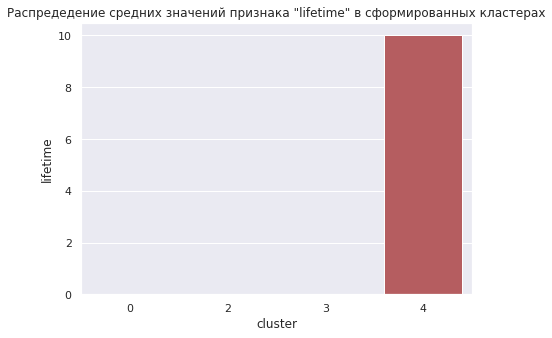

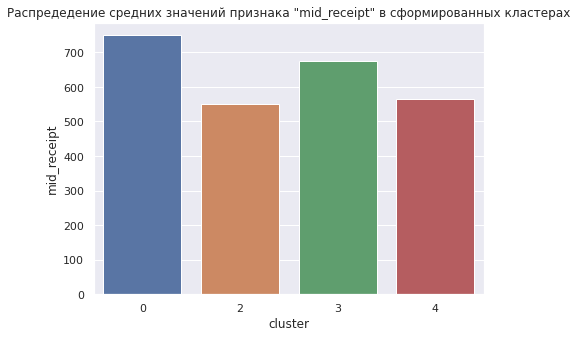

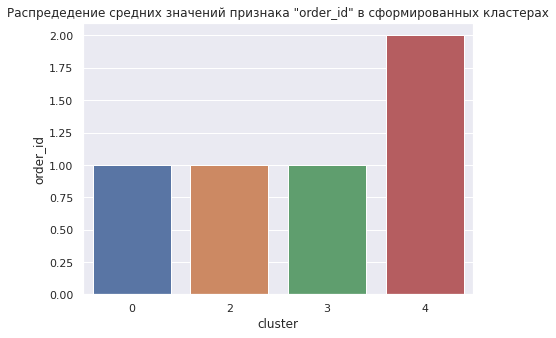

In [107]:
X_mean = df_t.query('cluster != 1 and cluster != 5').groupby('cluster', as_index = False).agg('median')
for i in X_mean.drop('cluster', axis = 1).columns:
    plt.figure(figsize=(7, 5))
    sns.barplot(x = 'cluster', y = i, data = X_mean)
    plt.title('Распредедение средних значений признака "{}" в сформированных кластерах'.format(i))
    plt.show()

<div class="alert alert-info">
    После кластеризации клиентов произошло их разделение на 4 оснвных профиля. Наиболее четко выделяется кластер '2', который
наиболее вероятно принадлежит к категории 'растения' (товары для сада, огорода, посадочный материал) и обладает следующими
признаками: усредненный месяц первой и последней покупок (май) относится к посадочному сезону, общая стоимость заказов клиентов
(600) и их средний чек (550) - минимальны из всех кластеров, что характерно для категории 'растения', клиенты кластера '2' 
имеют максимальное среднее удельное число заказов (2) и максимальное среднее число позиций в заказе (5), что характерно для
людей покупающих саженцы, средний лайф-тайм этих клиентов равен нулю, то есть они совершают разовые сезонные покупки. 
    Кластер '4' сформирован для клиентов с самым большим лайф-таймом (10), которые, в среднем, первую покупку совершили в апреле, 
а последнюю - в декабре. Клиенты кластера '4', в силу длительного лайф-тайма, имеют максимальные средние траты (порядка 1100) и
максимальное среднее число заказов (2), но их средний чек относсительно небольшой (560) и занимает 3 место среди всех кластеров.
Число клиентов кластера '4' также относительно невелико (450) - 3 место среди всех кластеров, а их любимая категория товаров
делится между 'хозтоварами' и 'посудой'. То есть, в кластер '4' входит относительно небольшое число постоянных покупателей
интернет-магазина, покупающих, в основном, повседневные недорогие хозтовары и посуду. 
    Клиенты кластера '0' наиболее многочисленны (700) и делают разовые покупки, в основном, в конце года (октябрь), ориентируясь,
вероятно, на хозтовары зимнего назначения (инвентарь, спец. жидкости и пр.). Так как эти клиенты имеют максимальный средний чек
(750), а их общие траты (около 750) находятся только на 3 месте, то это скорее всего разовые покупки относительно дорогих 
товаров преимущественно зимнего назначения, относящиеся к категориям хозтоваров и мебели. 
    Отличительной особенностью клиентов кластера '3' является выраженная сезонность - клиенты этого кластера совершают разовые
покупки зимой (средний месяц первой покупки - февраль) и ранней весной (последняя покупка в апреле). Они многочисленны 
(порядка 650 чел, 2 есто) имеют относительно высокие общие траты - более 800 (2 место) и высокий средний чек - 680 (2 место). 
Их любимыми категориями товаров являются хозтовары, посуда и мебель. Часть этих товаров может использоваться в качестве 
подарков на зимние и весенние прздники - это, например, товары категорий 'посуда' и 'мебель'. 
</div>

<div class="alert alert-info">
  <b> Статистическое сравнение совокупностей среднего чека клиентов в выделенных кластерах </b>
    <a id="start20"></a>
</div>

In [108]:
df_e['cluster'] = m_clusters

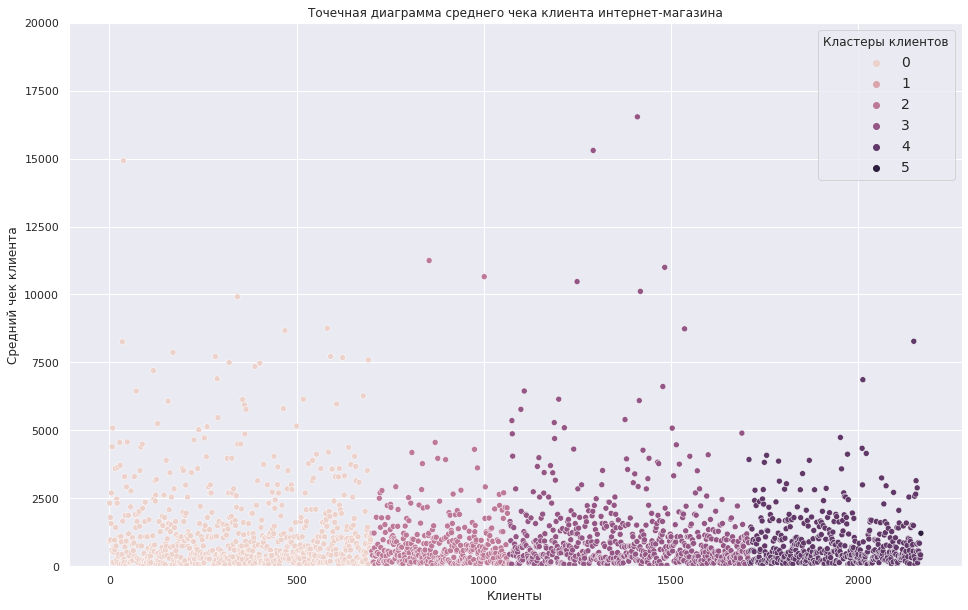

In [109]:
df_ev = df_e.groupby(['cluster','customer_id'], as_index = False).agg({'mid_receipt':'mean'})
df_ev['number'] = range(len(df_ev['customer_id']))
sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set(rc={'figure.figsize':(16,10)})  
ax = sns.scatterplot(data=df_ev, x = 'number', y="mid_receipt", hue = 'cluster')
plt.legend(loc = 'upper right', title = 'Кластеры клиентов', fontsize = 14)
ax.set (xlabel='Клиенты',
        ylabel='Средний чек клиента', ylim=(0,20000),
        title='Точечная диаграмма среднего чека клиента интернет-магазина')
pd.options.mode.chained_assignment = None;

<div class="alert alert-info">
  Точечная диаграмма распределения среднего чека клиента интернет-магазина имеет максимальную плотность в интервале
0 - 2500. При этом, для всех клиентских кластеров имеется довольно много точек с выручкой, превышающей 5000.  
</div>

In [110]:
perc_ = []
for i in df_ev.query('cluster != 1 & cluster != 5')['cluster'].unique():
    perc_.append([np.percentile(df_ev.loc[df_ev['cluster'] == i]['mid_receipt'], [95, 97.5, 99]), i])
perc_

[[array([4731.15, 7056.5 , 8670.88]), 0],
 [array([2519.25, 2926.95, 4225.28]), 2],
 [array([3710.5 , 5084.7 , 7930.26]), 3],
 [array([2816.65, 3506.15, 4136.68]), 4]]

<div class="alert alert-info">
  Для очистки данных для всех клиентских кластеров были рассчитаны верхние перцентили, которые показывают, что
средний чек клиентов из кластеров '0' и '3' размыт в более широких пределах, по сравнению с другими кластерами. 
Для удаления выбросов из данных целесообразно убрать точки, лежащие выше перцентиля 95%.
</div>

In [111]:
df_0 = df_ev.loc[(df_ev['cluster'] == 0) & (df_ev['mid_receipt'] < perc_[0][0][0])]

In [112]:
len(df_ev.loc[df_ev['cluster'] == 0]) - len(df_0)

35

In [113]:
df_2 = df_ev.loc[(df_ev['cluster'] == 2) & (df_ev['mid_receipt'] < perc_[1][0][0])]

In [114]:
len(df_ev.loc[df_ev['cluster'] == 2]) - len(df_2)

19

In [115]:
df_3 = df_ev.loc[(df_ev['cluster'] == 3) & (df_ev['mid_receipt'] < perc_[2][0][0])]

In [116]:
len(df_ev.loc[df_ev['cluster'] == 3]) - len(df_3)

32

In [117]:
df_4 = df_ev.loc[(df_ev['cluster'] == 4) & (df_ev['mid_receipt'] < perc_[3][0][0])]

In [118]:
len(df_ev.loc[df_ev['cluster'] == 4]) - len(df_4)

23

<div class="alert alert-info">
  После очистки данных были исключены выбросы, имеющие стоимость заказов выше перцентиля 95%. Число точек в кластерах 0, 2, 3
и 4 снизилось, соответственно, на 35, 19, 32 и 23.
</div>

In [119]:
st.mannwhitneyu(df_0['mid_receipt'],df_2['mid_receipt'],True,'two-sided').pvalue

2.57030253093881e-06

In [120]:
st.mannwhitneyu(df_0['mid_receipt'],df_2['mid_receipt'],True,'less').pvalue

0.9999987162690758

In [121]:
st.mannwhitneyu(df_0['mid_receipt'],df_2['mid_receipt'],True,'greater').pvalue

1.285151265469405e-06

<div class="alert alert-info">
  Формулировка гипотез: H0: ген совокупности А и В среднего чека клиентов кластеров '0' и '2' равны между собой,
                        уровень статистической значимости 5 %. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
  Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей среднего чека
показывает, что совокупность значений среднего чека клиентов в кластере '0' больше совокупности среднего чека
клиентов в кластере '2'.
</div>

In [122]:
st.mannwhitneyu(df_3['mid_receipt'],df_4['mid_receipt'],True,'two-sided').pvalue

0.26451050398152476

In [123]:
st.mannwhitneyu(df_3['mid_receipt'],df_4['mid_receipt'],True,'less').pvalue

0.8677893565240014

In [124]:
st.mannwhitneyu(df_3['mid_receipt'],df_4['mid_receipt'],True,'greater').pvalue

0.13225525199076238

<div class="alert alert-info">
  Формулировка гипотез: H0: ген совокупности А и В среднего чека клиентов кластеров '3' и '4' равны между собой,
                        уровень статистической значимости 5 %. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
  Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей среднего чека
показывает, что мы не можем опровергнуть нулевую гипотезу о равенстве совокупностей среднего чека клиентов кластеров 3 и 4. 

In [125]:
st.mannwhitneyu(df_3['mid_receipt'],df_2['mid_receipt'],True,'two-sided').pvalue

0.004553136919331964

In [126]:
st.mannwhitneyu(df_3['mid_receipt'],df_2['mid_receipt'],True,'less').pvalue

0.9977251657308699

In [127]:
st.mannwhitneyu(df_3['mid_receipt'],df_2['mid_receipt'],True,'greater').pvalue

0.002276568459665982

<div class="alert alert-info">
  Формулировка гипотез: H0: ген совокупности А и В среднего чека клиентов кластеров '3' и '2' равны между собой,
                        уровень статистической значимости 5 %. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
  Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей среднего чека
показывает, что совокупность значений среднего чека клиентов кластера 3 больше совокупности значений среднего чека клиентов
кластера 2. 

In [128]:
st.mannwhitneyu(df_0['mid_receipt'],df_3['mid_receipt'],True,'two-sided').pvalue

0.013686703097878408

In [129]:
st.mannwhitneyu(df_0['mid_receipt'],df_3['mid_receipt'],True,'less').pvalue

0.9931595669922192

In [130]:
st.mannwhitneyu(df_0['mid_receipt'],df_3['mid_receipt'],True,'greater').pvalue

0.006843351548939204

<div class="alert alert-info">
  Формулировка гипотез: H0: ген совокупности А и В среднего чека клиентов кластеров '0' и '3' равны между собой,
                        уровень статистической значимости 5 %. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
  Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей среднего чека
показывает, что совокупность значений среднего чека клиентов кластера 0 больше совокупности значений среднего чека клиентов
кластера 3. 

<div class="alert alert-info">
   Таким образом, статистическое сравнение среднего чека клиентов в раличных кластерах по очищенным данным
показывает, что совокупность клиентов кластера '0' имеет наибольший средний чек; ей уступают совокупности значений среднего
чека клиентов кластеров 3 и 4, которые статистически равны между собой. Совокупность же значений среднего чека клиентов 
клпастера 2 уступает всем остальным кластерам.
</div>

<div class="alert alert-info">
  <b> Выводы  </b>
    <a id="start9"></a>
</div>

<div class="alert alert-info"> 
 
<b>Подготовка данных</b>

    Исходная таблица содержит 3521 уникальных ID заказов. В соответствии с условиями оформления чека, каждому уникальному номеру
заказа должна соответствовать только одна дата. После группировки таблицы по 'order_id' выяснилось, что есть 284 уникальных
номеров заказов, которым соответствует более 1 даты. Так как при оформлении таких заказов была допущена ошибка, то они
были удалены и дата-фрейма. Соответственно, в итоговой таблице число строк снизилолсь до 5003, число уникальных номеров 
заказов снизилось до 3237, а число клиентов составило 2185 (снизилось на 266). 

<b> Разделение продукции интернет-магазина по категориям </b>

    После изучения данных в столбце 'product' было принято решение их разделить на 4 категории: 1) категория, связанная с 
растениями и рассадой ('растения'), 2) категория, связанная с мебелью ('мебель'), 3) категория 'посуда' и 4) категория 
хозяйственных товаров ('хозтовары'). Для каждой категории были выполнены запросы YaGPT2 - 'перечислить до 100 однозначных 
названий товаров (соответствующей категории). Полученные от YaGPT2 списки названий были помещены в отдельные excel-файлы,
которые были размещены на яндекс-диске. Содержимое файлов было преобразовано в списки названий товаров, которые использовались 
для классификации товаров. В результате был создан столбец 'category', содержащий для каждой позиции ('product')
соответствующее название категории товара.   

<b> Распределение клиентов интернет-магазина по числу заказов и среднему чеку </b>

   Диаграмма распределение клиентов по количеству заказов искажена из-за наличия клиента с очень большим числом 
заказов (более 120). Также несколько клиентов совершили более 5 заказов.  
   Медианное число заказов на 1 клиента интернет-магазина составляет 1. Менее 10 клиентов совершили более 3 покупок.
   Среднее число заказов на 1 клиента (1,45) в 1,5 раза превышает медианное (1). Максимальное число заказов составляет 126. 
Данное распределение достаточно плотное, но имеет несколько выбросов с числом заказов более 3, что повышает среднее 
стандартное отклонение до 2,7. 
   Диаграмма распределения среднего чека также искажена из-за ранее выявленных клиентов с большим количеством заказов
(средний чек более 10000).
   Диаграмма распределения среднего чека по очищенным данным (для клиентов со средним чеком менее 10000) показывает довольно
большое количество выбросов (средний чек более 2500), в то время, как медианный средний чек около 500. 
   Средняя величина 'среднего чека' (1280) почти в 2 раза превышает медианную (506) при весьма высоком стандартном отклонении
(13806). Это говорит о том, что распределение среднего чека имеет очень большой разброс - от 9 до 675000 и большое количество
выбросов с величиной чека более 2500.
    
<b> Изучение структуры продаж интернет-магазина </b>

     Более 50 % всех продаж интернет-магазина приходится на хозтовары, товары для сада и огорода (растения) занимают 26 % продаж,
а посуда и мебель составляют по 9 % в структуре объемов продаж. 
     Наибольшую выручку магазину (72 %) приносят хозтовары, затем идет мебель (12 %), а посуда и растения приносят, соответственно,
7 и 10 % выручки. Таким образом, доля растений в выручке (10 %) существенно ниже их доли в общем количестве заказов (26 %). И, 
наоборот, доля мебели в общей выручке (12 %) выше, по с ее долей в общем количестве заказов (9 %). Скорее всего это связано с 
тем, что средняя цена одного предмета в категории 'мебель' существенно выше, по сравнению с ценой одной позиции в категории
'растения'. 
     Товары категории 'мебель' имеют наибольшую среднюю цену (1500), далее идут хохтовары (около 800), посуда (около 400) и 
растения (около 150). 
     Больше всего предметов в одном заказе характерно для категорий хозтовары и посуда (около 3). Заказы категорий растения и 
мебель содержать в среднем около 2 позиций. 

<b> Распределение среднего чека клиентов интернет-магазина по категориям </b>

     Распределение среднего чека клиентов по очищенным данным показывает, что медианный средний чек уменьшается в ряду
категорий 'мебель' - 'хозтовары' - 'посуда' - 'растения'. Наибольшее число выбросов со средним чеком более 3000 имеет 
категория 'хозтовары' (в том числе, и аномально высокоий средний чек около 700000). Категории 'мебель', 'посуда' и 'растения' 
имеют также достаточно много выбросов со средним чеком, соответственно, более 5000, более 1000 и более 1000. 
     Среднее и медианное значения 'среднего чека' увеличиваются в ряду категорий товаров: растения - посуда - хозтовары - мебель.
В категориях растения, посуда и хозтовары среднее значение данного фактора более, чем в 2 раза превосходит медианное значение,
что свидетельствует о большом количестве выбросов в распределении среднего чека по данным категориям. Меньше всего выбросов в 
категории мебель, где среднее значение параметра 'средний чек' превышает медианное значение менее, чем на 20 %. 
     Меньше всего клиентов интернет-магазина находятся в товарной категории 'мебель', не смотря на то, что именно эта категория
обеспечивает максимальное значение среднего чека. Больше всего клиентов вполне ожидаемо в категории 'хозтовары', 
средняя выручка от которой уступает категории 'мебель'. На втором месте по числу клиентов располагается категория 'растения', 
которая характеризуется минимальным значением среднего чека. Таким образом, обозначается проблема клиентского дисбаланса, когда 
клиенты приносящие наибольшую выручку (категория 'мебель') находятся в меньшинстве, в то время, как низкоприбыльные клиенты
(из категории 'растения') непропорционально многочисленны. Количество клиентов категории 'хозтовары' также находится в 
дисбалансе со своей средней выручкой, так как относительно высокую величину среднего чека клиентов данной категории обеспечивает 
наличие выбросов с аномально высокми значениями среднего чека выше 10000, в  том числе, присутствие в данного категории клиента
со средним чеком около 700000. 

<b> Когортный анализ клиентов интернет-магазина </b>
     
    В течение исследуемого периода (10.2018 - 10.2019) количества ежемесячно привлеченных новых клиентов в категориях
'посуда' и 'мебель' оставались примерно равными и постепенно снижались от 25-30 чел/мес до 15 - 20 чел/мес. Число привлеченных
клиентов в категории 'растения' за весь период превышало первые 2 категории; в 'растениях' наблюдается выраженный максимум 
притока новых клиентов (до 100 чел/мес) с марта по июнь 2019, связанный, вероятно, с сезонной востребованностью товаров данной 
категории. Наибольшее количество ежемесячно привлеченных новых клиентов было в категории 'хозтовары', однако, их число 
претерпевало существенные колебания и, в целом, в указанный период последовательно снижалось от 130 - 150 чел/мес 
до 80-100 чел/мес. 
    Для изучения динамики удержания клиентов интернет-магазина исходный датафрейм был сгруппирован в когорты по датам 
привлечения новых клиентов и разбит на месячные лайф-таймы. Были рассчитаны коэффициенты удержания для разных когорт
в первый месяц (первый лайф-тайм) после месяца образования когорты. Обращает внимание чрезвычайно низкое удержание клиентов,
когда на второй месяц после образования когорты коэффициенты удержания для всех когорт практически близки к нулю. Величина
месячного коэффициента удержания для всех когорт не превышает 5 %. Наибольшие значения коэффициента удержания (3,5 - 4 %) были
достигнуты для когорт, образованных в середине исследуемого периода (03.2019 - 05.2019). Для когорт, образованных в конце 
наблюдаемого периода (08.2019 - 10.2019) месячный коэф удержания не превышал 2,8 %. 
    Для исследования изменения товарной структуры покупок были построены круговые диаграммы количества клиентов в когортах, 
сформированных в начале (2018-10-01), середине (2019-04-01) и конце (2019-10-01) исследуемого периода. В течение года 
доли заказов на посуду и мебель немного снизились от 14 до 13 % и от 11 до 6 %, соответственно, а доля растений, 
увеличившись в середине цикла (сезонный эффект) до 42 %, к концу цикла (2019-10-01) составила 25 %, что на 5 % больше, чем для
прошлогодней когорты (от 2018-10-01). Соответственно, рост доли заказов на растения с 20 до 25 % произошел за счет снижения 
доли мебели с 11 до 6 %. Доля клиентов в хозтоварах в начале и конце цикла практически не изменилась и составила 55 % (в начале)
и 56 % (в конце). 

<b> Статистическое сравнение распределений выручки от клиента в разных категориях товаров </b>

    Формулировка гипотез: H0: ген совокупности А и В выручки от клиента категорий 'мебель' и 'посуда' равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
    Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей выручки от клиента
показывает, что совокупность выручки от клиента в категории 'мебель' больше совокупности выручки от клиента в категории
'посуда'.
     Формулировка гипотез: H0: ген совокупности А и В выручки от клиента категорий 'хозтовары' и 'мебель' равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
    Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей выручки от клиента
показывает, что совокупность клиентской выручки в категории 'мебель' больше совокупности выручки в категории 'хозтовары'.
    Формулировка гипотез: H0: ген совокупности А и В выручки от клиента категорий 'хозтовары' и 'посуда' равны между собой. 
                        Н1 'greater': ген сов А больше ген сов В
                        Н1 'two-sided': ген сов А и В не равны
                        H1 'less': ген сов В больше ген сов А
    Использование непараметрического метода st.mannwhitneyu() для сравнения очищенных последовательностей выручки от клиента
показывает, что совокупность клиентской выручки в категории 'хозтовары' больше совокупности выручки категории 'посуда'. 
    Таким образом, статистические расчеты сравнения выручки от клиента в раличных категориях товаров по очищенным данным
показывают, что совокупность клиентов категории 'мебель' приносит наибольшую выручку; ей уступает совокупность клиентов
категории 'хозтовары', которая, в свою очередь, превосходит выручку от клиентов категории 'посуда'. Наименьшую выручку
приносят клиенты категории 'растения'.

<b> Кластеризация клиентов интернет-магазина </b>

   Для кластеризации с целью выявления профилей клиентов подготовлена сводная таблица, в которой каждый клиент охарактеризован
следующими признаками: месяц первой покупки (first_month), месяц последней покупки (last_month), общие траты (cost), среднее
число позиций в заказе (ratio), среднее количество предметов (единиц товара) в заказе (quantity_per_order), предпочтительная
категория товароа (category_), максимальный лайф-тайм (lifetime), средний чек (mid_receipt) и общее число заказов (order_id).
   Построенная дендрограмма показывает, что датафрейм заказов содержит 2 основных кластера, один из которых делится еще
на 4 подкоастера, а другой - на 2. Таким образом, при использовании метода кластеризации K-Means логично использовать разделение 
на 6 кластеров.
   Больше всего точек содержит кластер '0', далее идут кластеры '3', '4' и '2'. В кластерах '1' и '5' элеменетов практически нет.
По сути, произошло разделение на 4 кластера.
   После кластеризации клиентов произошло их разделение на 4 оснвных профиля. Наиболее четко выделяется кластер '2', который
наиболее вероятно принадлежит к категории 'растения' (товары для сада, огорода, посадочный материал) и обладает следующими
признаками: усредненный месяц первой и последней покупок (май) относится к посадочному сезону, общая стоимость заказов клиентов
(600) и их средний чек (550) - минимальны из всех кластеров, что характерно для категории 'растения', клиенты кластера '2' 
имеют максимальное среднее удельное число заказов (2) и максимальное среднее число позиций в заказе (5), что характерно для
людей покупающих саженцы, средний лайф-тайм этих клиентов равен нулю, то есть они совершают разовые сезонные покупки. 
    Кластер '4' сформирован для клиентов с самым большим лайф-таймом (10), которые, в среднем, первую покупку совершили в апреле, 
а последнюю - в декабре. Клиенты кластера '4', в силу длительного лайф-тайма, имеют максимальные средние траты (порядка 1100) и
максимальное среднее число заказов (2), но их средний чек относсительно небольшой (560) и занимает 3 место среди всех кластеров.
Число клиентов кластера '4' также относительно невелико (450) - 3 место среди всех кластеров, а их любимая категория товаров
делится между 'хозтоварами' и 'посудой'. То есть, в кластер '4' входит относительно небольшое число постоянных покупателей
интернет-магазина, покупающих, в основном, повседневные недорогие хозтовары и посуду. 
    Клиенты кластера '0' наиболее многочисленны (700) и делают разовые покупки, в основном, в конце года (октябрь), ориентируясь,
вероятно, на хозтовары зимнего назначения (инвентарь, спец. жидкости и пр.). Так как эти клиенты имеют максимальный средний чек
(750), а их общие траты (около 750) находятся только на 3 месте, то это скорее всего разовые покупки относительно дорогих 
товаров преимущественно зимнего назначения, относящиеся к категориям хозтоваров и мебели. 
    Отличительной особенностью клиентов кластера '3' является выраженная сезонность - клиенты этого кластера совершают разовые
покупки зимой (средний месяц первой покупки - февраль) и ранней весной (последняя покупка в апреле). Они многочисленны 
(порядка 650 чел, 2 есто) имеют относительно высокие общие траты - более 800 (2 место) и высокий средний чек - 680 (2 место). 
Их любимыми категориями товаров являются хозтовары, посуда и мебель. Часть этих товаров может использоваться в качестве 
подарков на зимние и весенние прздники - это, например, товары категорий 'посуда' и 'мебель'. 
    Cтатистическое сравнение совокупностей среднего чека клиентов в раличных кластерах по очищенным данным
показывают, что совокупность клиентов кластера '0' имеет наибольший средний чек; ей уступают совокупности значений среднего
чека клиентов кластеров 3 и 4, которые статистически равны между собой. Совокупность же значений среднего чека клиентов 
клпастера 2 уступает всем остальным кластерам.

<div class="alert alert-info">
  <b> Рекомендации  </b>
</div>

<div class="alert alert-info">

<b>Текущее состояние бизнеса</b>
   
    В настоящее время интернет-магазин имеет весьма неоднородную клиентуру с небольшим средним чеком (500) и совершающую, 
в среднем, не более 1 заказа в год. Клиенты, совершившие более 3 покупок в год и имеющие средний чек более 2500, скорее 
маргинальны и не оказывают существенного влияния на бизнес. Большинство клиентов покупают товары с низкой потенциальной 
выручкой - это либо хозтовары повседневного назначения или сезонные продукты и растения для сада и огорода. Доля в структуре
продаж относительно рентабельных товаров, например, мебели, посуды или подарочных наборов, не превышает 20 %. Клиентская
база магазина демонстрирует чрезвычайно низкое удержание, месячное значение которого не превышает 4 % (средний лайф-тайм  
не превышает месяца) и продолжает снижаться до 2,8 % в конце исслежуемого периода. При этом, структура продаж за исследуемый 
период, если не принимать во внимание сезонное повышение доли товаров для сада, изменяется в сторону снижения доли более 
дорогих товаров (в основном, мебели) в пользу более дешевой продукции из категории 'растения', что говорит о развитии 
деградационных процессов в структуре выручки из-за нарастающего дисбаланса товарного ассортимента. 

<b>Потенциальные точки роста выручки</b>

  Проведенные этапы категоризации и кластеризации заказов интернет-магазина позволили выявить недооцененные товарные группы 
'мебель' и 'посуда', имеющие относительно высокий потенциал с точки зрения выручки и возможности реализации обнаруженной 
подарочной сезонности потребительского поведения большого количества клиентов. Поэтому для повышения эффективности бизнеса 
необходимо предпринять следующие шаги:
    1) Увеличить долю мебельного сегмента, который приносит наибольшую выручку, 
    2) Предпринять срочные действия рекламного характера (карты клиентской лояльности, гибкая система скидок для постоянных 
покупателей, клиентоориентированные подарочные сертификаты и пр.) для повышения месячного коэффициента удержания клиентов до 
25 - 30 % и среднего лайф-тайма до 6 - 8 мес, 
    3) Для удержания клиентов и повышения выручки использовать выявленную сезонную активность покупателей в первый квартал 
года, развивая сегмент подарочных тематических наборов посуды, мебели и др. товаров, ориентированных на конкретные праздники, 
например, Новый Год или 8 марта. 
    4) Поддержка предзимней сезонной активности, которая наблюдается для большинства клиентов интернет-магазина - расширение
хозтоваров зимнего назначения от снегоуборочного инвентаря до зимней автомобильной резины. 
    
</div>